# Regression:

Regression is a statistical method for predicting numeric outcomes based on input features. 
It models relationships, finds the best-fit line, and quantifies how changes in inputs relate
to changes in output. Various types of regression, like linear or multiple regression, suit 
different data and relationship complexities.

# Problem Statement :
    

# Business Case:

Concrete as a building block of most construction is the most important material in civil engineering.
The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients
include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined
from the laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative
output variable, and 1030 instances (observations)

# Data analysis Report

# Dataset features and its charactaristics:

Cement:
Definition: Primary binding material in concrete, composed of limestone, clay, shells, and silica.
Role: Provides strength and durability to concrete as it hardens and binds other components.
# ...........................................................................................
Slag:
Definition: 
    Byproduct of metal smelting; used in concrete for improved durability and reduced heat generation.
Role:
    Enhances concrete strength, durability, and resistance to chemical corrosion.
# ..............................................................................................
    
Ash:
Definition: 
    Fine particles resulting from the combustion of coal or other materials.
Role: 
    Used as a supplementary cementitious material to improve workability and reduce the heat of hydration.
# ....................................................................................................
    
Water:
Definition: 
    Essential component in concrete mix, aiding in the hydration process of cement.
Role: 
    Initiates the chemical reaction with cement, contributing to the hardening and setting of concrete.
# ........................................................................................................    

Superplastic:
Definition: 
    High-range water-reducing admixture, improving workability without compromising strength.
Role: 
    Enhances concrete flowability, reducing water content and improving placement and consolidation.
Coarse 
# ..........................................................................................................

Aggregate:
Definition: 
    Larger particles, such as gravel or crushed stone, used in concrete mix.
Role: 
    Provides strength and structural support, reducing the amount of cement required.
    
# .............................................................................................................
Fine Aggregate:
Definition: 
    Smaller particles, like sand, included in concrete mix.
Role: 
    Fills voids between coarse aggregates, contributing to workability and influencing concrete strength.
# .................................................................................................................

Age:
Definition: 
    Time elapsed since the concrete mixture was prepared.
Role: 
    Affects the properties of concrete, as hydration continues and the material gains strength over time.
# ...................................................................................................................
Strength:
Definition: 
    Ability of concrete to withstand applied forces or loads.
Role: 
    Crucial parameter indicating the material's capacity to support structural loads and resist deformation.

#### Domain Analysis for Concrete Strength Prediction:
- The given dataset is related to the prediction of concrete compressive strength, which is a crucial factor in assessing the performance of concrete in construction. The dataset includes various features that describe the composition of the concrete mix and its curing conditions.
  1. The dataset appears to be suitable for supervised learning as it includes a target variable (Strength) that can be predicted based on the other features.
  2. The features include a mix of numerical (float, int) and representational (e.g., age) types, indicating a need for preprocessing and scaling depending on the chosen machine learning algorithms.
   3. There are no explicit categorical features in this dataset; all features are numerical or ordinal.
   4. The dataset includes a time-related feature: "Age," representing the curing age of the concrete.
   5. The target variable is "Strength," representing the compressive strength of the concrete. This variable is crucial for assessing the quality of the concrete.
   6. Challenges in this domain may include understanding the intricate relationships between the various components of the concrete mix and the compressive strength. Domain expertise is crucial for interpreting the results correctly.

In [1]:
# import libraties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Bsic checks

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.shape

(1030, 9)

In [8]:
df.size

9270

In [9]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [10]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Insights:

- Count:

    1. Count represents the number of observations or data points in each column.
    2. For all columns, there are 1030 data points.
- Mean (Average):

    1. The mean is the average value of the data.
    2. For example, the mean cement content is approximately 281.17.
- Standard Deviation (std):

    1. Standard deviation measures the amount of variation or dispersion in a set of values.
    2. For instance, the standard deviation of the cement column is approximately 104.51.
- Minimum (min):

    1. The minimum value is the smallest observation in the dataset.
    2. For example, the minimum value for the age column is 1.
- 25th Percentile (25% or Q1):

    1. The 25th percentile is the value below which 25% of the data falls.
    2. It represents the lower quartile of the data.
    3. For instance, the 25th percentile of the superplastic column is 0.
- 50th Percentile (Median or 50% or Q2):

     1. The median is the middle value of the dataset.
     2. It represents the value below which 50% of the data falls.
     3. For example, the median value for the fineagg column is 779.5.
- 75th Percentile (75% or Q3):

     1. The 75th percentile is the value below which 75% of the data falls.
     2. It represents the upper quartile of the data.
    3. For instance, the 75th percentile of the age column is 56.
- Maximum (max):

    1. The maximum value is the largest observation in the dataset.
    2. For example, the maximum value for the strength column is 82.6.

In [11]:
df.duplicated().sum()

25

In [12]:
df.shape[1]

9

# EDA(Exploratory data analysis)

In [13]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Univariate Analysis

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import sweetviz as sv

In [16]:
mr = sv.analyze(df)
mr.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


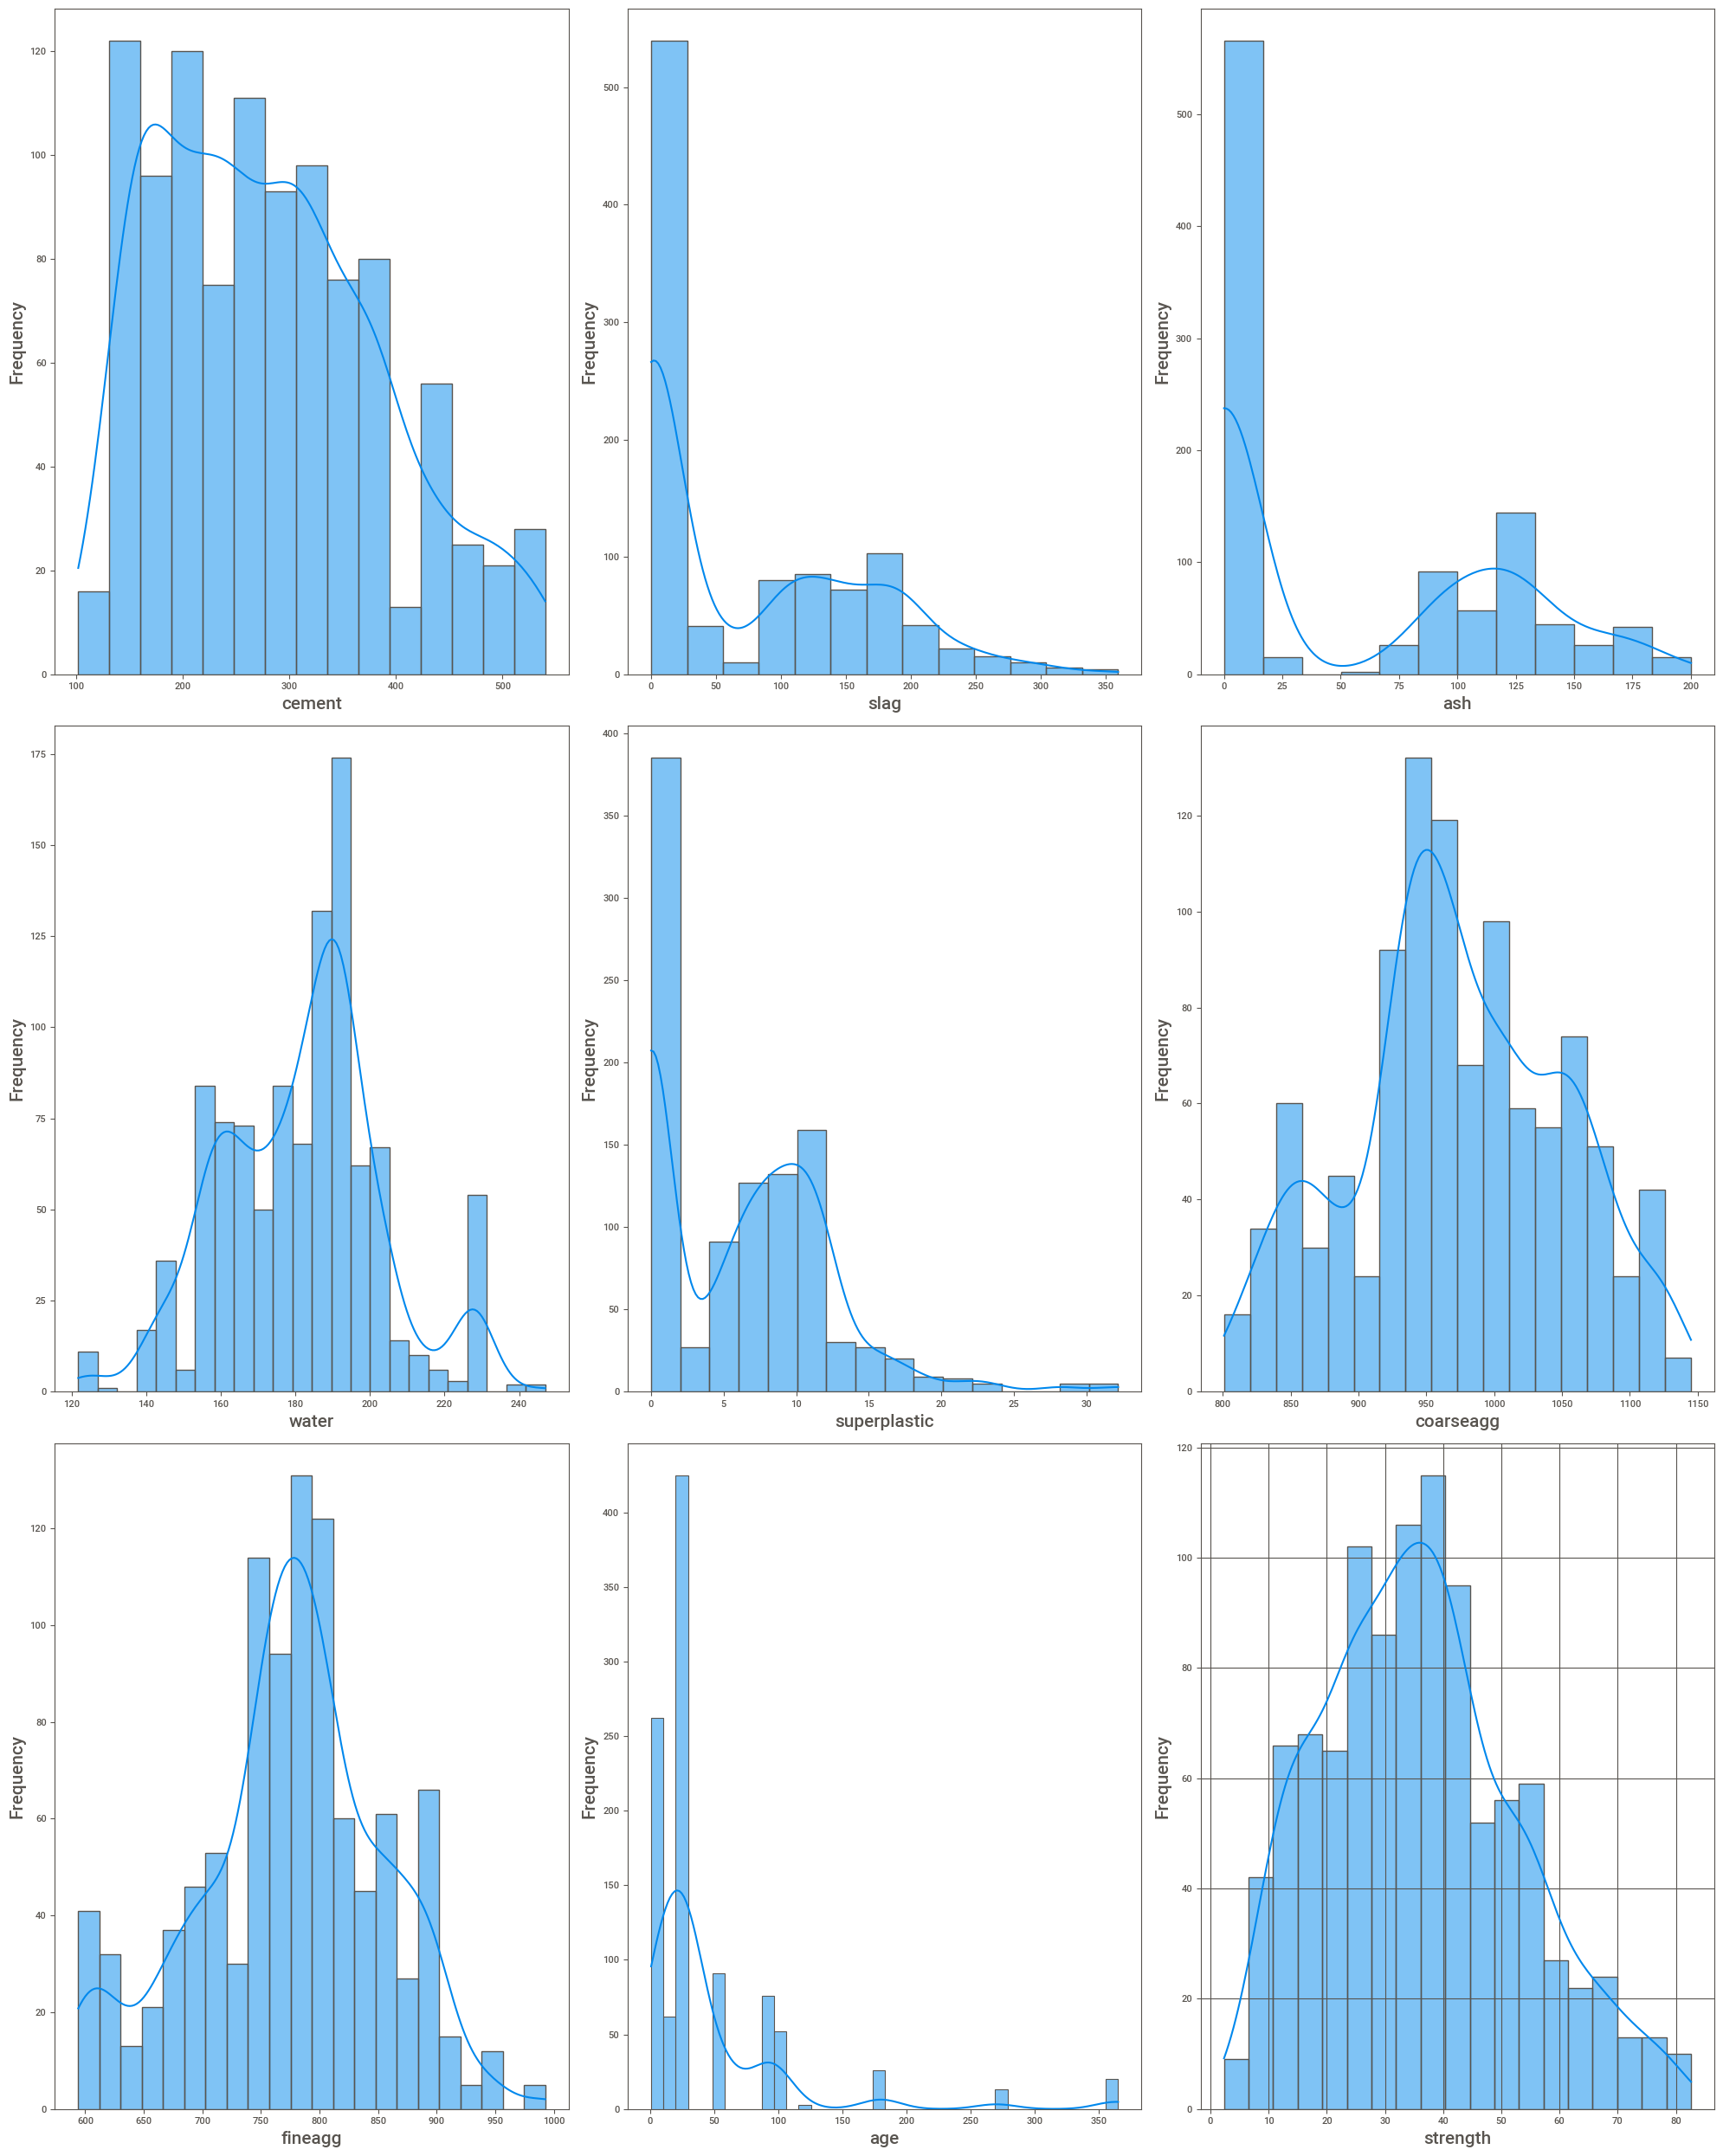

In [17]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df.columns:
    plt.subplot(3,3, plotnumber)
    sns.histplot(x = df[column], kde =True)
    
    plt.xlabel(column, fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plotnumber += 1
    
plt.tight_layout()
plt.grid(True)
plt.show()

#### Insights from univariate Analysis:

Concrete:
    1) The concrete data have high frequency 100 to 200.This range occurs more frequently than other .
        We can say it have high peakedness in the distribution of concrete values within this specific intervals.
        The distribution is not Normal and have skewness and is rightly skewed
Slag:
    1) The slag have high frequency for 0 to 60.The slage also have peakedness and have right skewed  distribution.
water:
    water have more dense values in range 150 - 20 and have left skewed distribution
     

# Bivariate Analysis

<Axes: xlabel='strength', ylabel='age'>

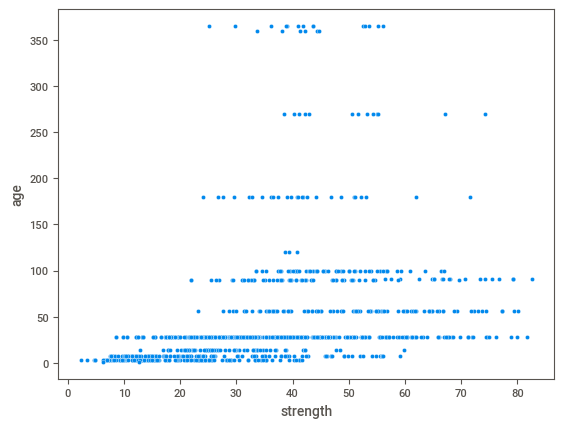

In [18]:
# Strenth vs Age 
sns.scatterplot(x = 'strength', y = 'age',data = df)

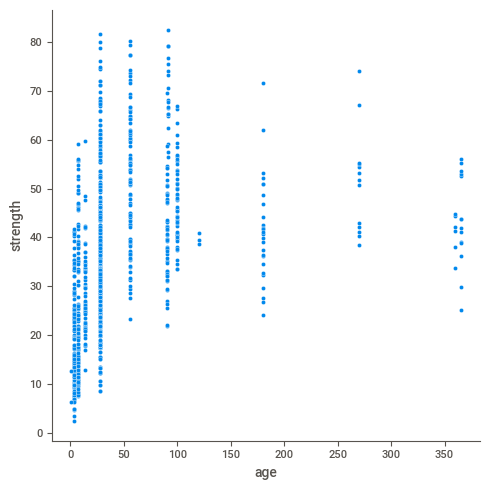

In [19]:
sns.relplot(x = 'age', y = 'strength', data = df)

<Axes: xlabel='strength', ylabel='cement'>

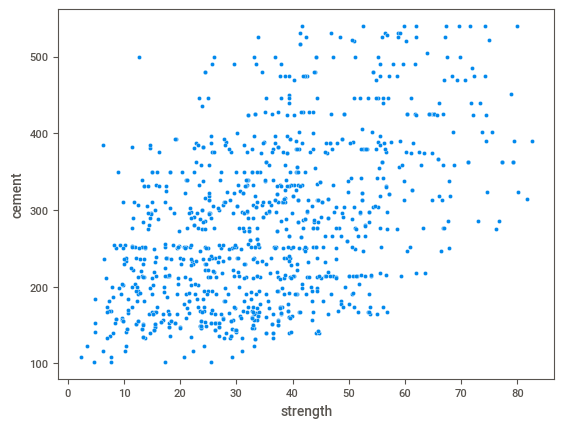

In [20]:
sns.scatterplot(x = 'strength', y = 'cement', data = df)

#### Multivariate analysis:

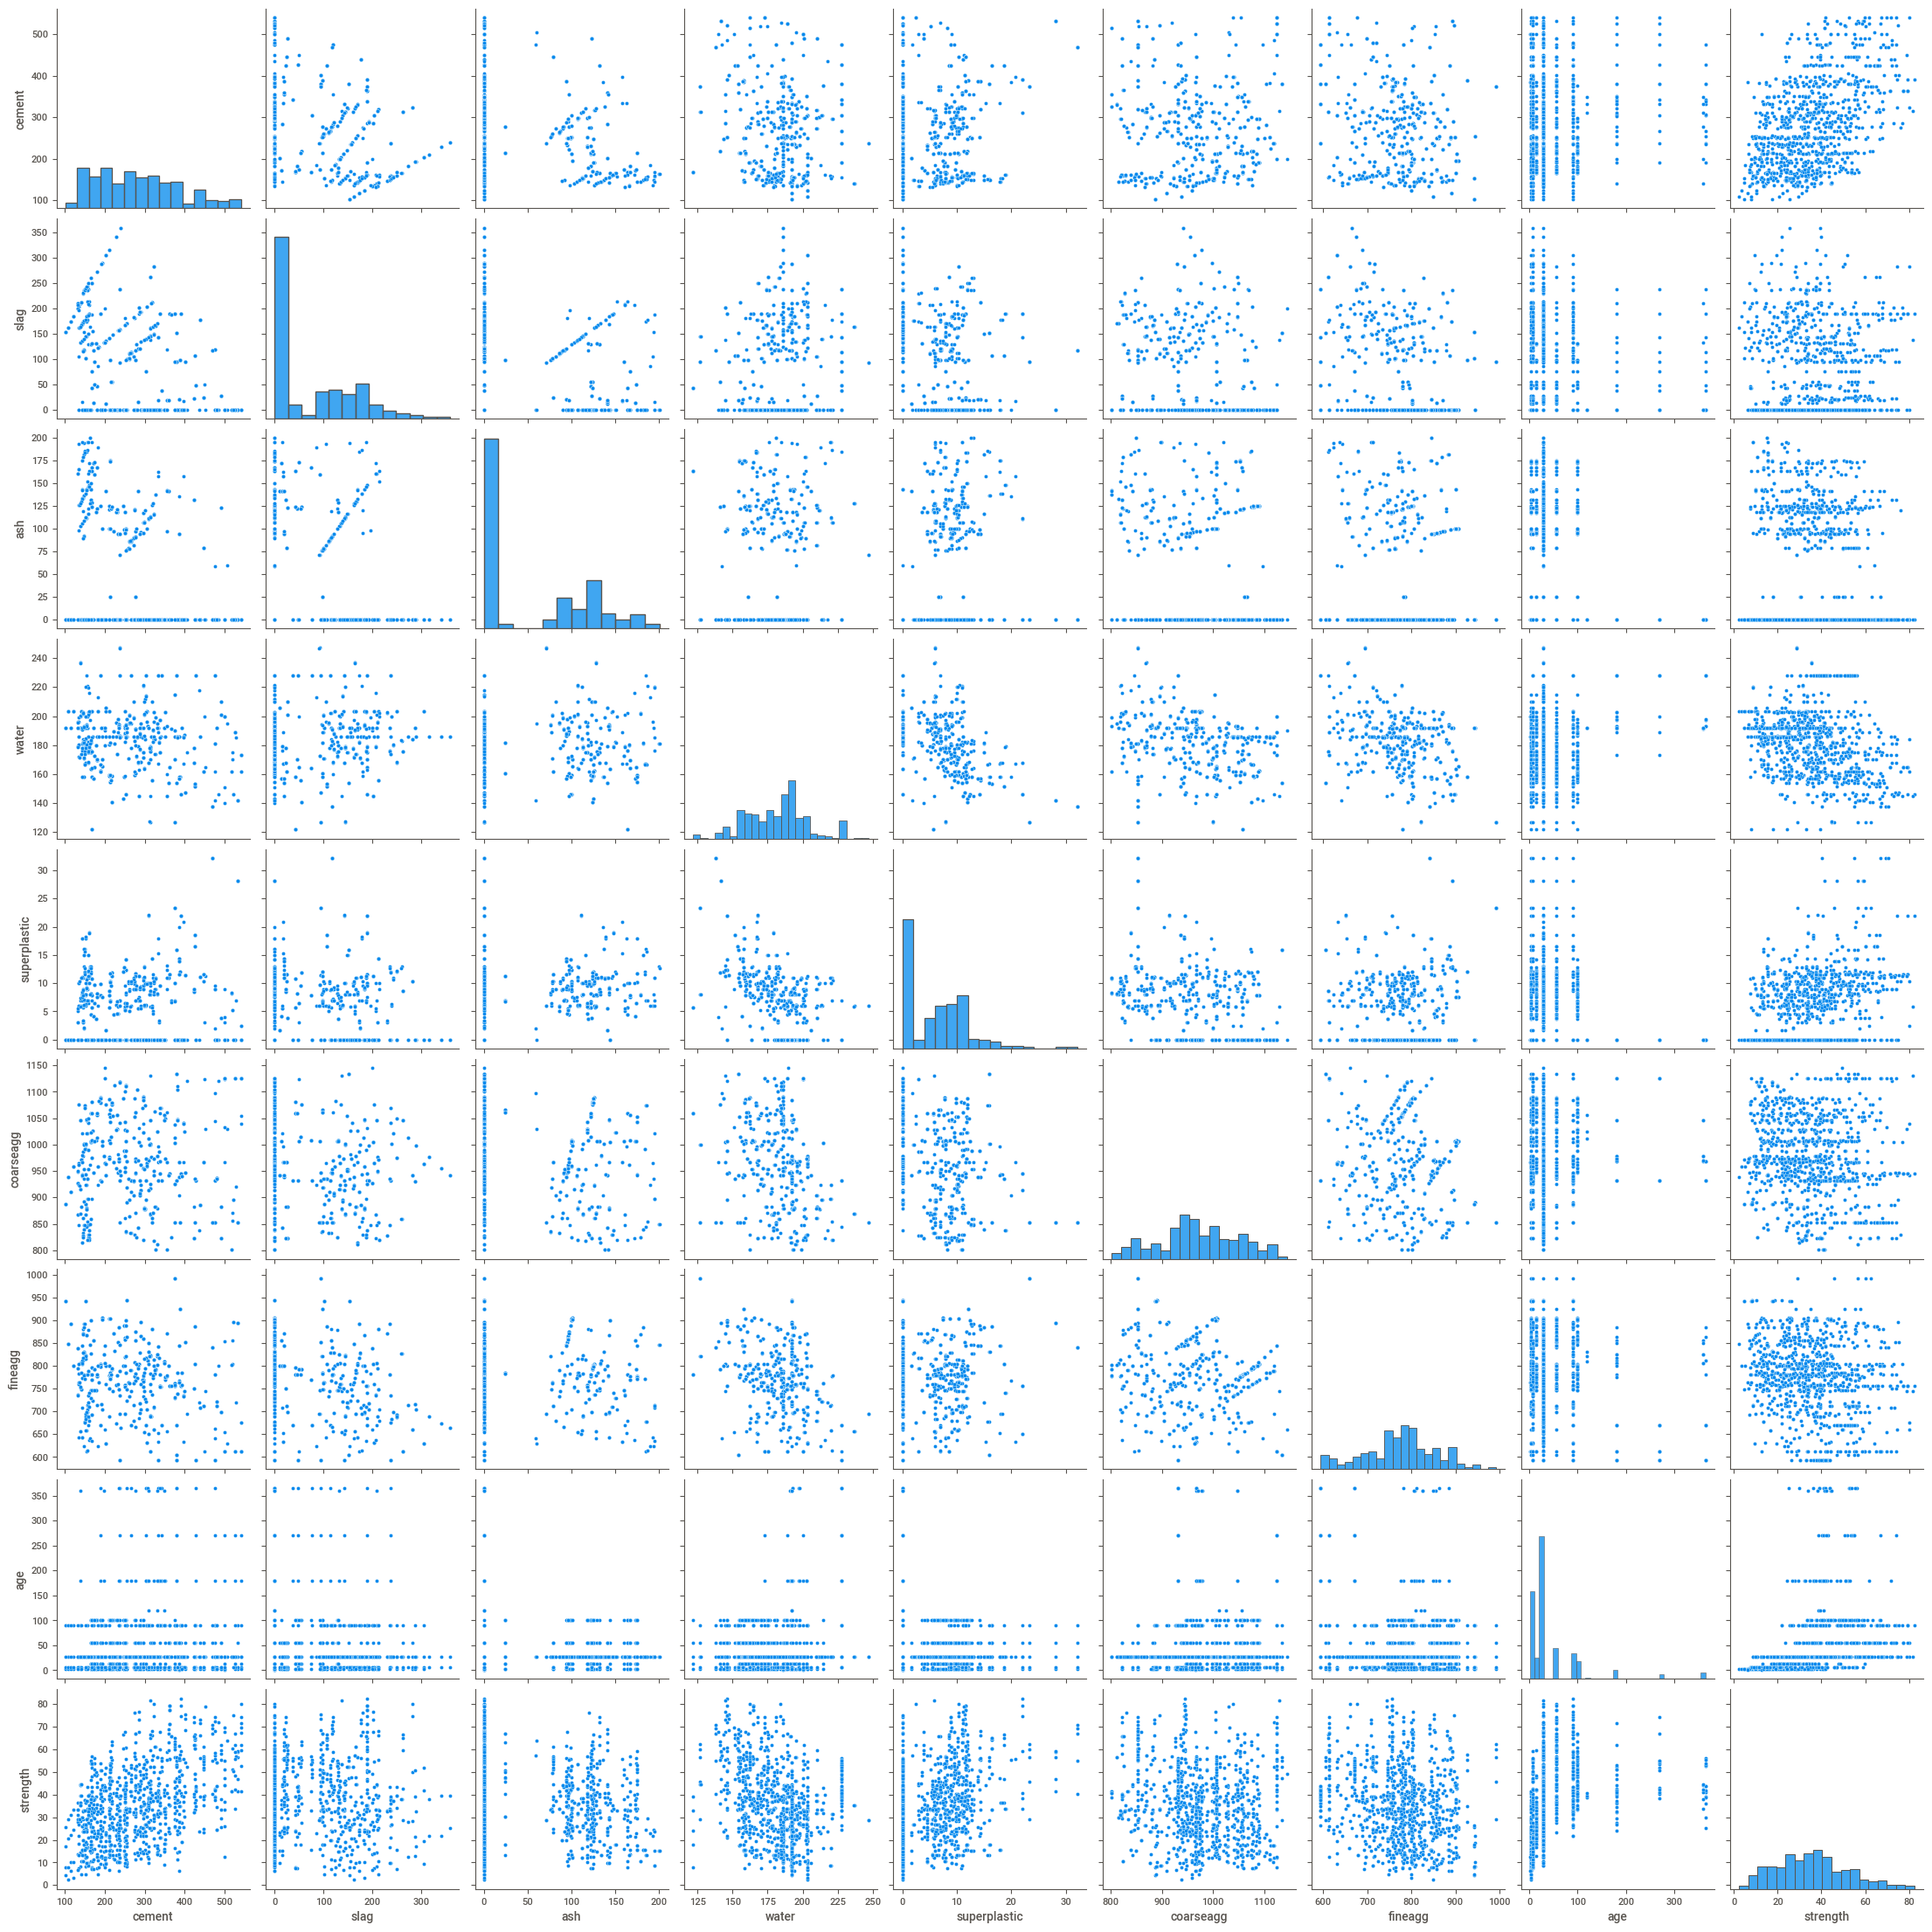

In [21]:
features_subset = df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']]

# Creating a pair plot
sns.pairplot(features_subset)
plt.show()

In [22]:
features_subset.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


# Insights:
The correlation matrix reveals key relationships within the dataset. Notably, a strong positive correlation exists between "cement" and "strength," suggesting that higher cement content tends to result in increased strength. Conversely, a negative correlation between "water" and "strength" implies that higher water content might lead to reduced strength. Additionally, the matrix highlights a complex interplay among other variables, showcasing how changes in one factor may influence another. Understanding these correlations aids in optimizing concrete mixtures for enhanced strength and durability.

# Data Preprocessing

In [23]:
# Handling missing values

In [24]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [25]:
# checking null values
df.notnull().sum()

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

In [26]:
# statistical measure
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Count:
There are 1030 data points in the dataset.

Mean:
The average value of 'cement' is approximately 281.17, 'slag' is 73.24, and so on for the other columns.

Standard Deviation:
'Water' has a standard deviation of approximately 20.60, indicating the degree of variability in its values.

Minimum:
The minimum value for 'age' is 1, suggesting the presence of very young concrete samples in the dataset.

25th Percentile (Q1):
25% of the 'superplastic' values are below 0, and 25% of 'age' values are below 7.

Median (50th Percentile or Q2):
The median value for 'coarseagg' is 968, representing the middle value of this column.

75th Percentile (Q3):
75% of the 'fineagg' values are below 779.5, and 75% of 'strength' values are below 46.135.

Maximum:
The maximum value for 'cement' is 540, indicating the highest observed value in the dataset.so on for the other columns.

In [27]:
# There is no constant feature but we check 
cons_feature = df.columns[df.std() ==0]
cons_feature

# It means we have no constant features

Index([], dtype='object')

Outlier:
    An outlier is a data point that significantly differs from the majority of other data points in a dataset.
    It is unusually distant from the rest and can distort statistical analyses. Identifying and handling outliers
    is crucial for accurate and meaningful data analysis.

# Boxplot
 In a boxplot, the x-axis represents different groups or categories, while the y-axis represents the
 distribution or range of a variable within each group. It provides a visual summary of the central tendency,
 spread, and potential outliers in each group's data distribution.

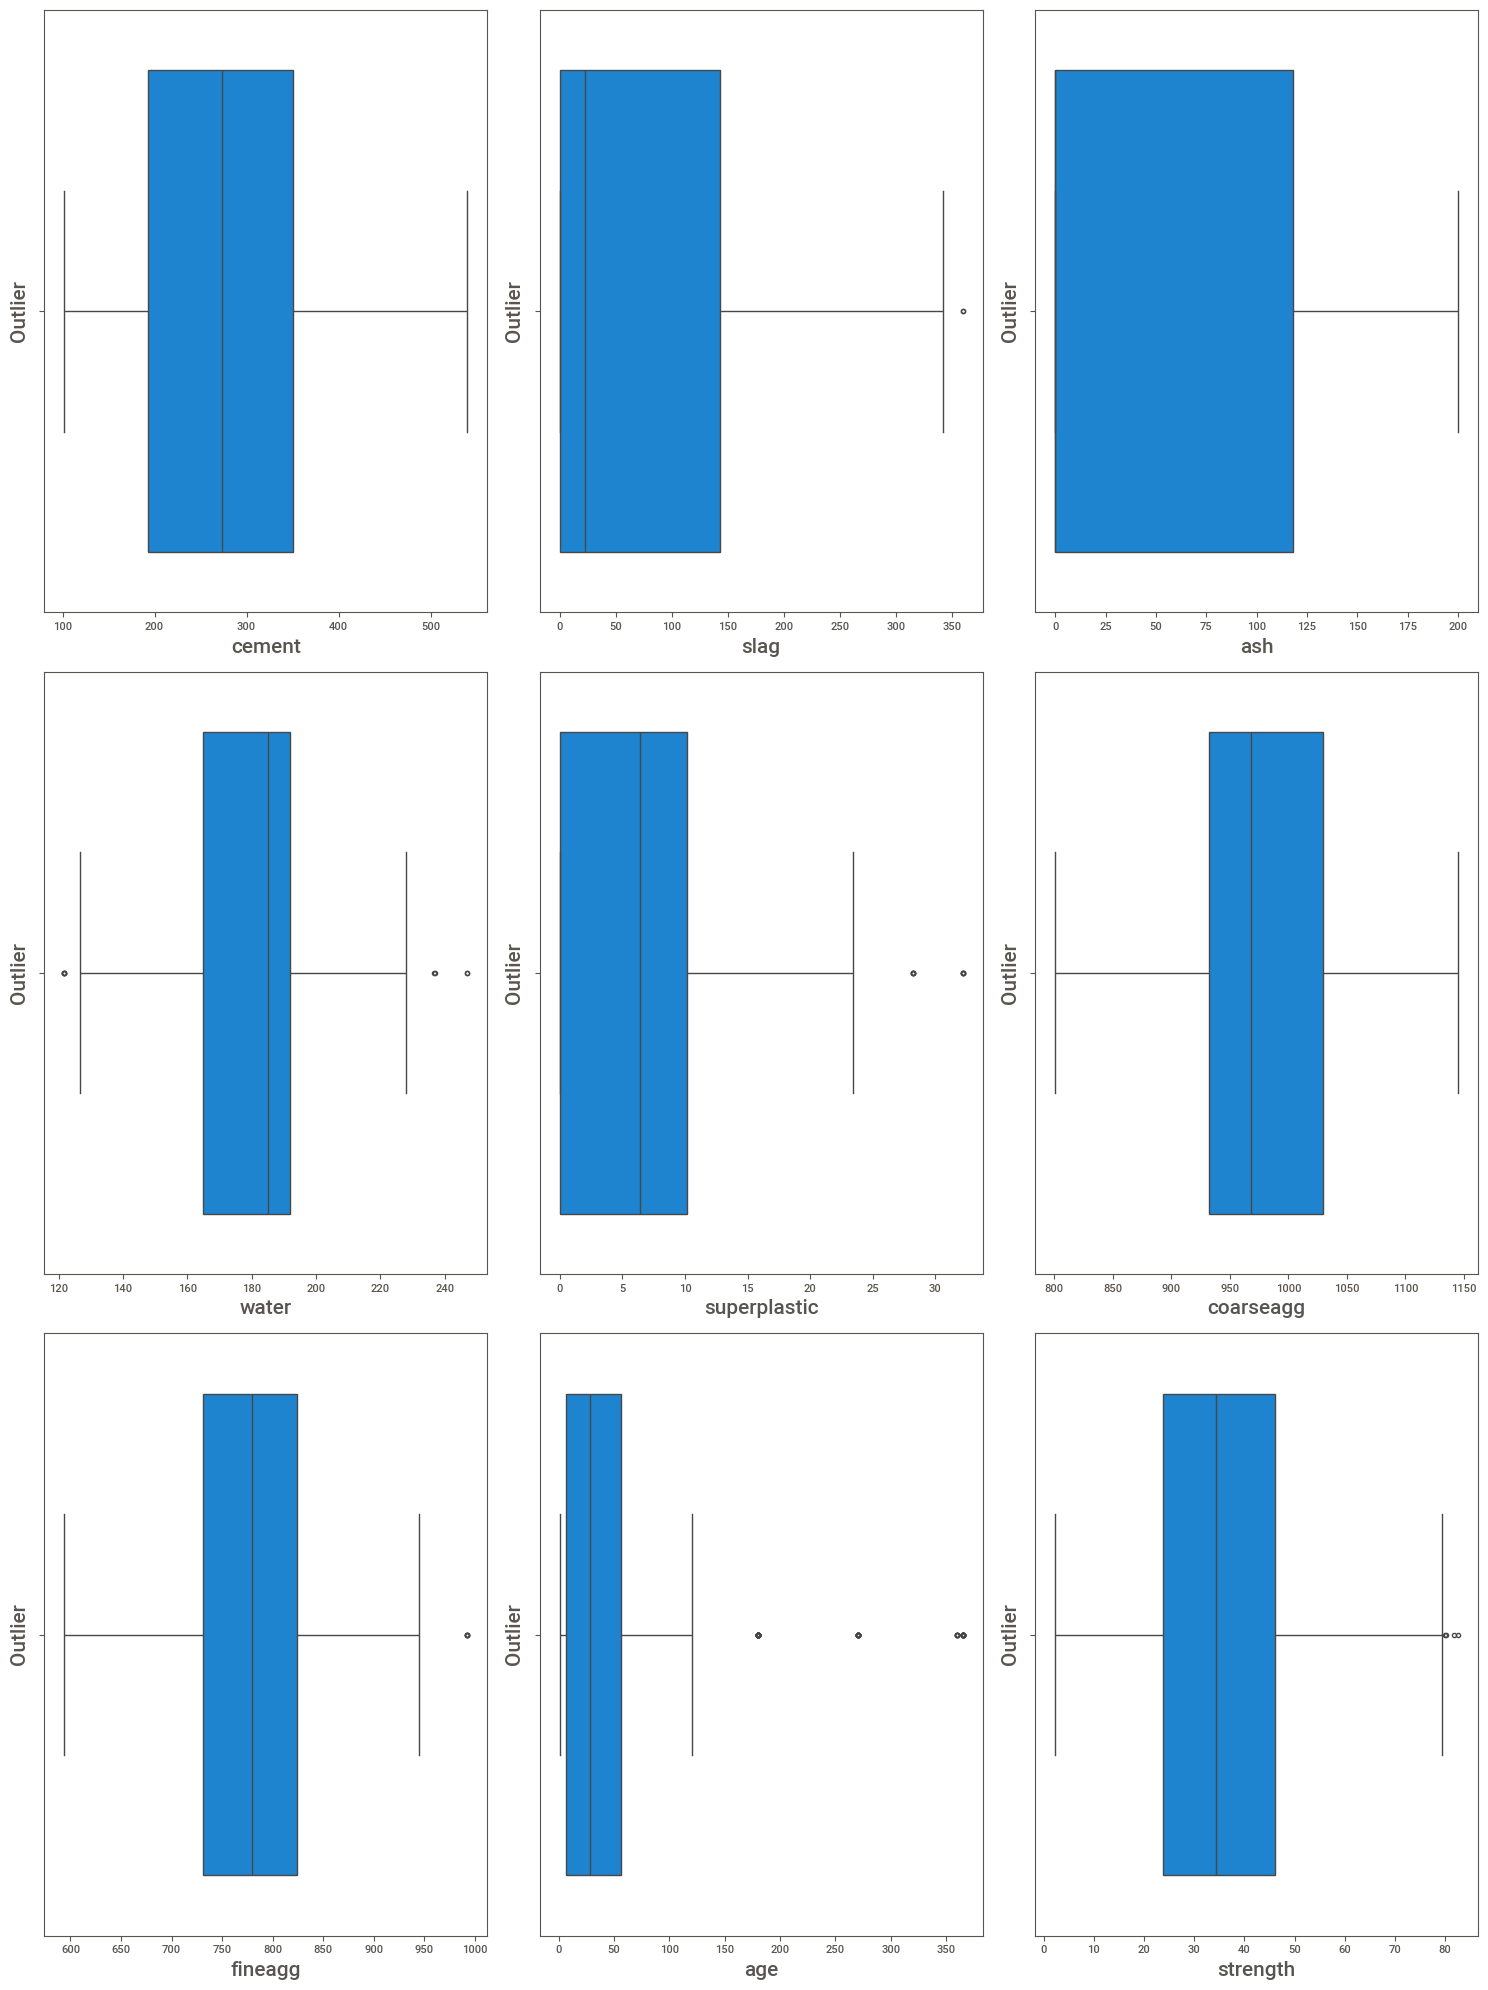

In [28]:
plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber =1
for column in df.columns:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x = df[column])
    
    plt.xlabel(column, fontsize = 15)
    plt.ylabel('Outlier', fontsize = 15)
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# How outlier is handled?

Here we used Interquartile Range(IQR) because of several benifits and reasons:
    
Robustness to Extreme Values:
The IQR method is less sensitive to extreme values than other methods like standard deviation.
It focuses on the middle 50% of the data, making it robust in the presence of outliers.


Non-Parametric Approach:
The IQR method is non-parametric and does not assume a specific distribution of the data. 
It is applicable to a wide range of datasets, including those that may not follow a normal distribution.

Clear Definition of Outliers:
Outliers are explicitly defined based on the spread of the middle 50% of the data. 
This clarity in definition makes it easier to understand and communicate the presence of outliers.

Flexibility with Multipliers:
The method allows for flexibility in choosing the multiplier (e.g., 1.5) to adjust the sensitivity to outliers.
This adaptability makes it suitable for various datasets and analysis goals.

Visual Identification:
Box plots, commonly used with the IQR method, provide a visual representation of the data distribution and
the presence of outliers. This aids in the intuitive understanding of the data's spread.

Application in Skewed Distributions:
The IQR method is effective even in the presence of skewed distributions where mean and standard deviation may not 
accurately represent the central tendency and spread.

In [29]:
# All values min_limit and max_limit and IQR of all features:

In [30]:
boxplot_info = {}

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR

    boxplot_info[column] = {
        'Min_Limit' :min_limit,
        'Max_Limit' :max_limit,
        'IQR':IQR
    }

for column, info in boxplot_info.items():
    print(f"column : {column}")
    print(f"Max_limit :{info['Max_Limit']}")
    print(f"Min_limit :{info['Min_Limit']}")
    print(f"IQR : {info['IQR']}")
    print()

column : cement
Max_limit :586.4375
Min_limit :-44.0625
IQR : 157.625

column : slag
Max_limit :357.375
Min_limit :-214.42499999999998
IQR : 142.95

column : ash
Max_limit :295.75
Min_limit :-177.45
IQR : 118.3

column : water
Max_limit :232.64999999999998
Min_limit :124.25000000000001
IQR : 27.099999999999994

column : superplastic
Max_limit :25.5
Min_limit :-15.299999999999999
IQR : 10.2

column : coarseagg
Max_limit :1175.5000000000002
Min_limit :785.8999999999999
IQR : 97.40000000000009

column : fineagg
Max_limit :963.5749999999999
Min_limit :591.3750000000001
IQR : 93.04999999999995

column : age
Max_limit :129.5
Min_limit :-66.5
IQR : 49.0

column : strength
Max_limit :79.77250000000001
Min_limit :-9.927500000000002
IQR : 22.425000000000004



In [31]:
# Now we will create a function that will print only those features which have outliers

In [32]:
def identify_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    outliers = df[(df[column] < min_limit) | (df[column] > max_limit)]
    return outliers

for column in df.columns:
    outliers = identify_outliers(column)
    outliers_count= len(outliers)
    if outliers_count >= 0:
        print(f"Features {column} has {outliers_count} outliers")

Features cement has 0 outliers
Features slag has 2 outliers
Features ash has 0 outliers
Features water has 9 outliers
Features superplastic has 10 outliers
Features coarseagg has 0 outliers
Features fineagg has 5 outliers
Features age has 59 outliers
Features strength has 4 outliers


In [33]:
feature_with_outlier = ['slag','water','superplastic','fineagg', 'age']

In [34]:
for col in feature_with_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR

    df[col] = np.where((df[col] < min_limit) | (df[col] > max_limit),
                      df[col].median() , df[col])

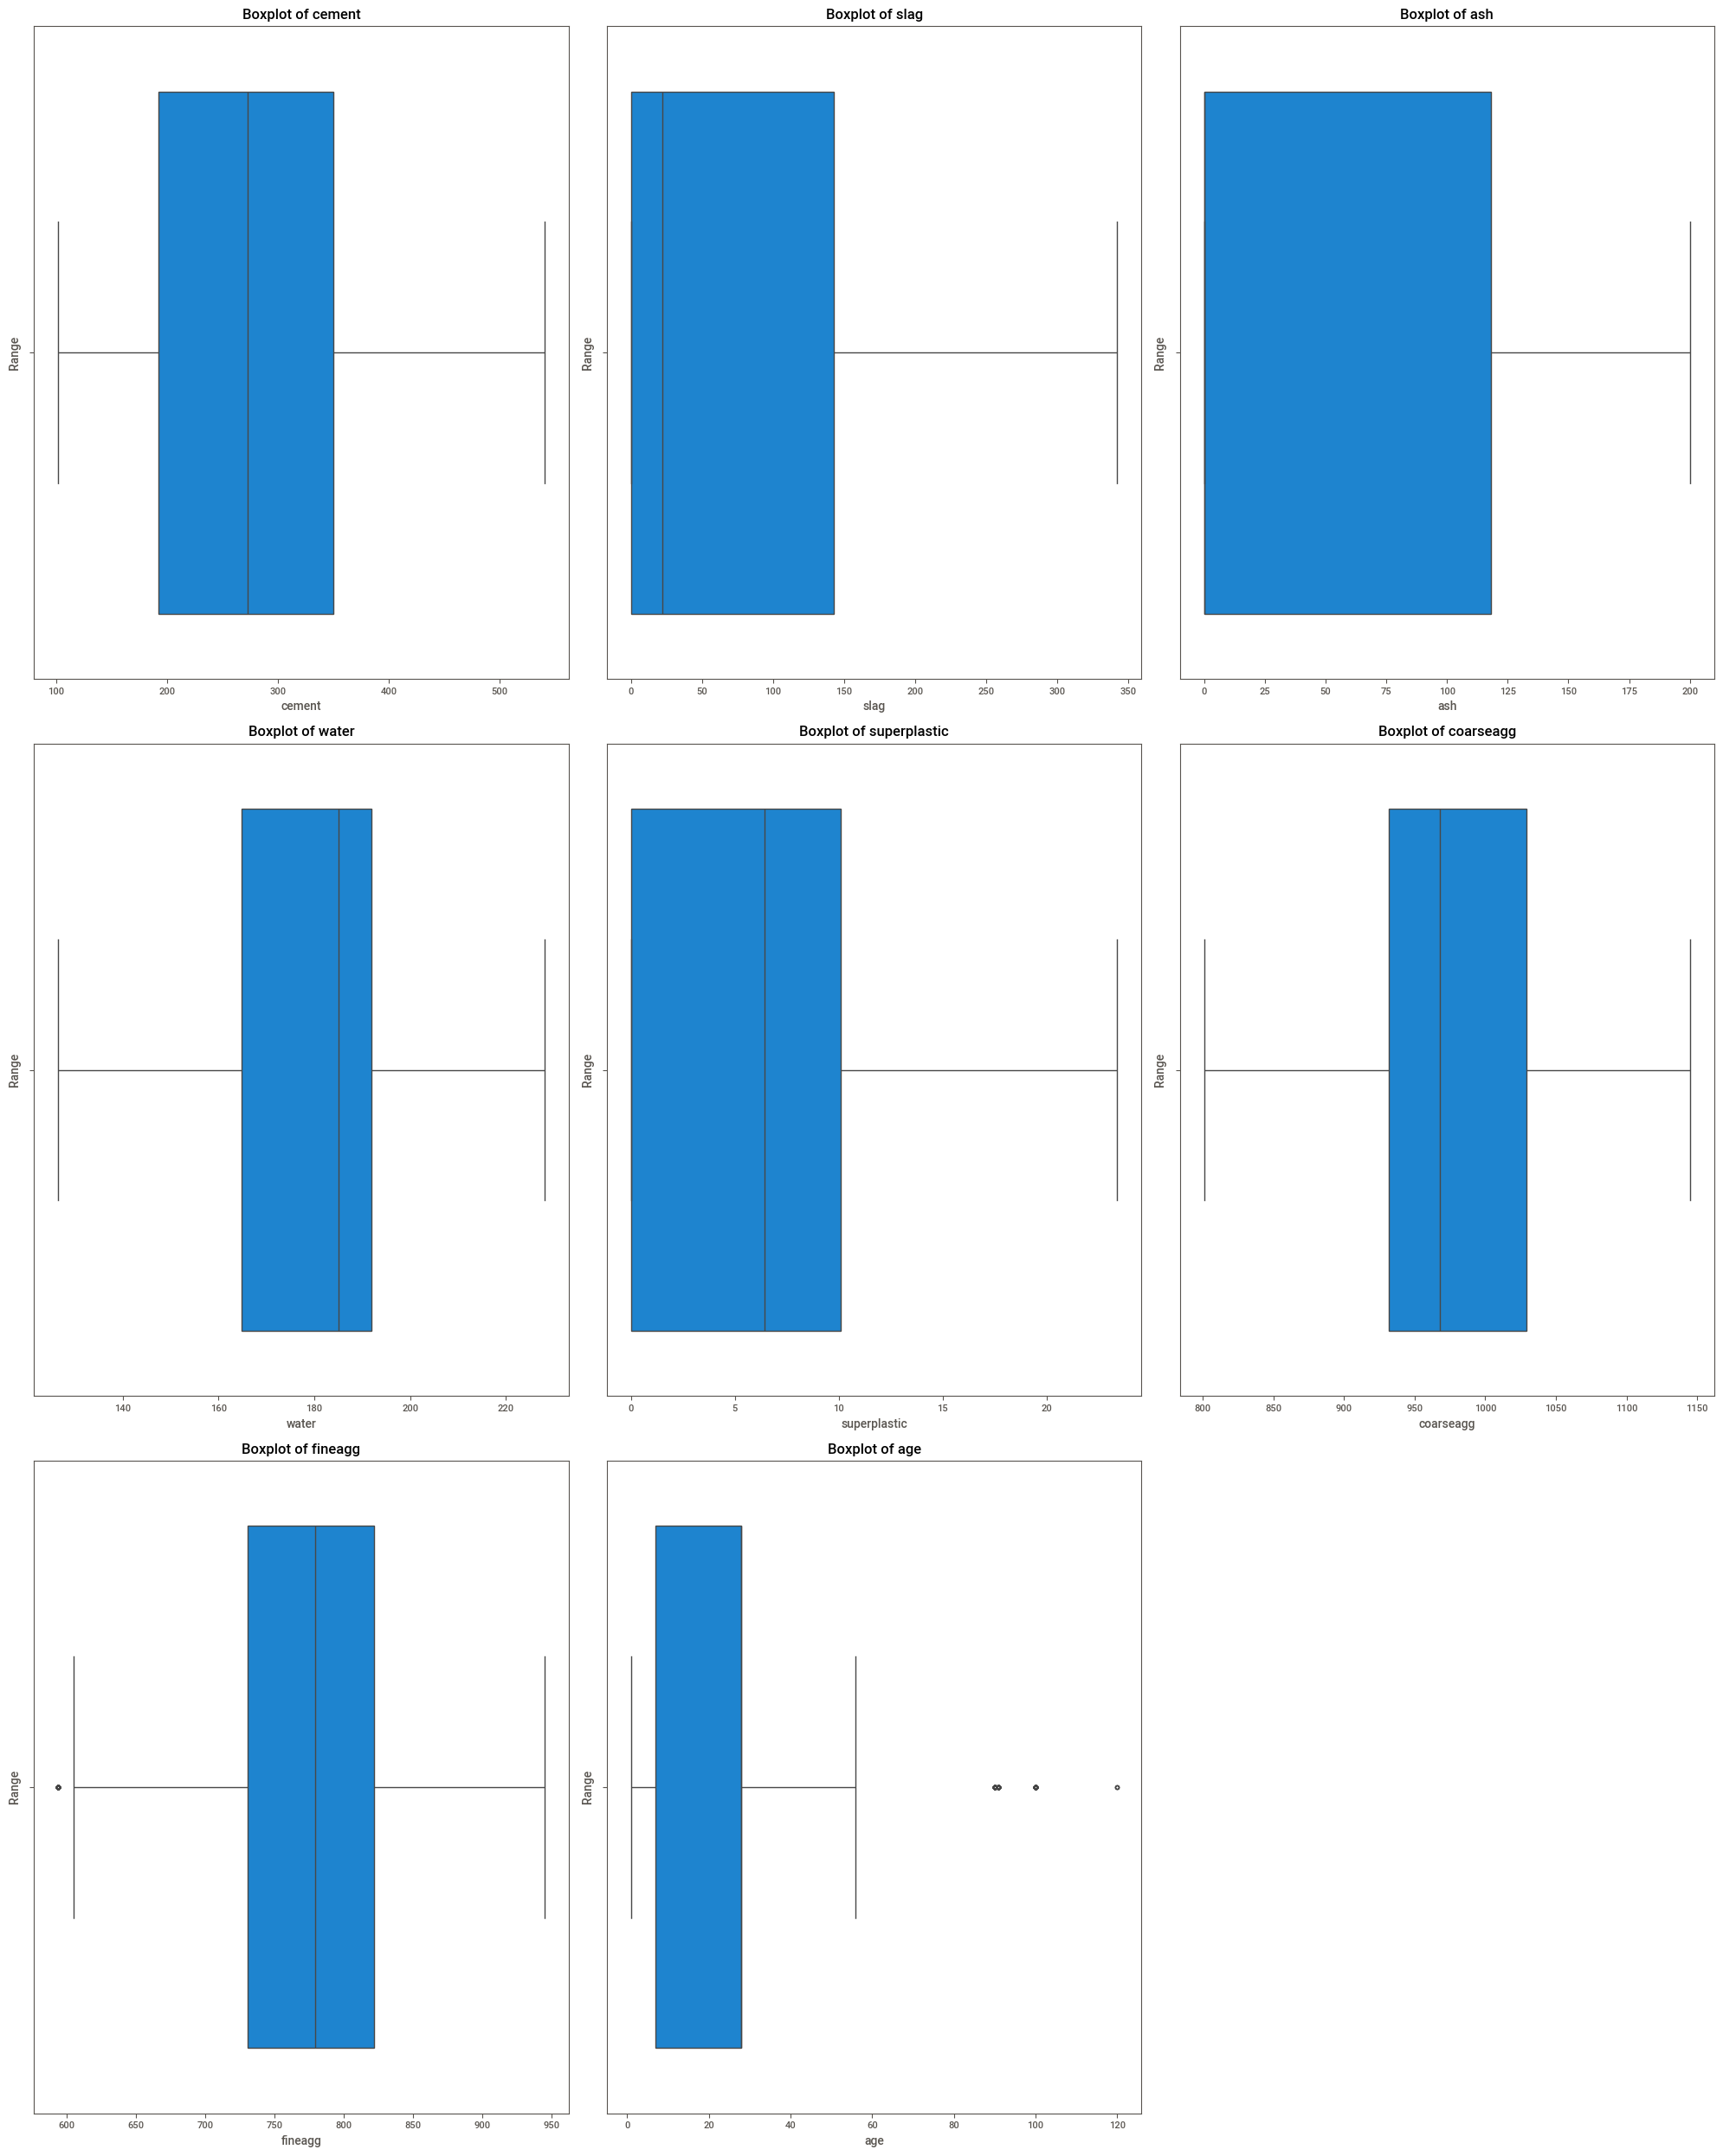

In [35]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in df.columns[:-1]:
    if plotnumber <= 9:
        plt.subplot(3,3, plotnumber)
        sns.boxplot(x= df[column])

        plt.title(f"Boxplot of {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Range', fontsize= 10)
        plotnumber += 1

plt.tight_layout()

### Scaling of data

Scaling is the process of transforming numerical features to a standardized range,
typically between 0 and 1 or with a mean of 0 and a standard deviation of 1.
This ensures that all features contribute equally to machine learning models, 
preventing biases due to varying magnitudes. Scaling is essential for algorithms
relying on distance or gradient-based optimization, promoting consistent and efficient model performance.

In [36]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.30


In [37]:
# use MinMaxScaler we have skewed data

I use MinMaxScaler because MinMaxScaler is a data preprocessing technique used in machine learning to transform numerical
features, scaling them to a specific range. The scaler linearly scales each feature to a user-defined range,
often between 0 and 1. This ensures that all features have comparable magnitudes, preventing certain
variables from dominating others due to their original scale. 

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaling = MinMaxScaler()

In [40]:
x = df.iloc[:,:-1]

In [41]:
x

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [42]:
scaled = scaling.fit_transform(x)

In [43]:
scaled

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.23361823,
        0.22689076],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.23361823,
        0.22689076],
       [0.52625571, 0.41654487, 0.        , ..., 0.38081395, 0.        ,
        0.22689076],
       ...,
       [0.10616438, 0.40748319, 0.54272864, ..., 0.26569767, 0.52991453,
        0.22689076],
       [0.1303653 , 0.54574686, 0.        , ..., 0.54825581, 0.55527066,
        0.22689076],
       [0.36278539, 0.29377375, 0.39130435, ..., 0.18459302, 0.47720798,
        0.22689076]])

In [44]:
X  = pd.DataFrame(scaled, columns = x.columns)

In [45]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,1.000000,0.000000,0.000000,0.349112,0.106838,0.694767,0.233618,0.226891
1,1.000000,0.000000,0.000000,0.349112,0.106838,0.738372,0.233618,0.226891
2,0.526256,0.416545,0.000000,1.000000,0.000000,0.380814,0.000000,0.226891
3,0.526256,0.416545,0.000000,1.000000,0.000000,0.380814,0.000000,0.226891
4,0.220548,0.387021,0.000000,0.644970,0.000000,0.515698,0.659544,0.226891
...,...,...,...,...,...,...,...,...
1025,0.398174,0.339082,0.451274,0.522682,0.380342,0.200872,0.496581,0.226891
1026,0.502740,0.000000,0.577711,0.684418,0.444444,0.049128,0.625071,0.226891
1027,0.106164,0.407483,0.542729,0.651874,0.260684,0.265698,0.529915,0.226891
1028,0.130365,0.545747,0.000000,0.483235,0.482906,0.548256,0.555271,0.226891


In [46]:
y =df.strength

In [47]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

In [48]:
# data is scaled

# Encoding:
<!-- #     so we have no categorical values we skip this step  -->

In [49]:
# we have no categorical values so we will skip this step

# Feature Engineering

<Axes: >

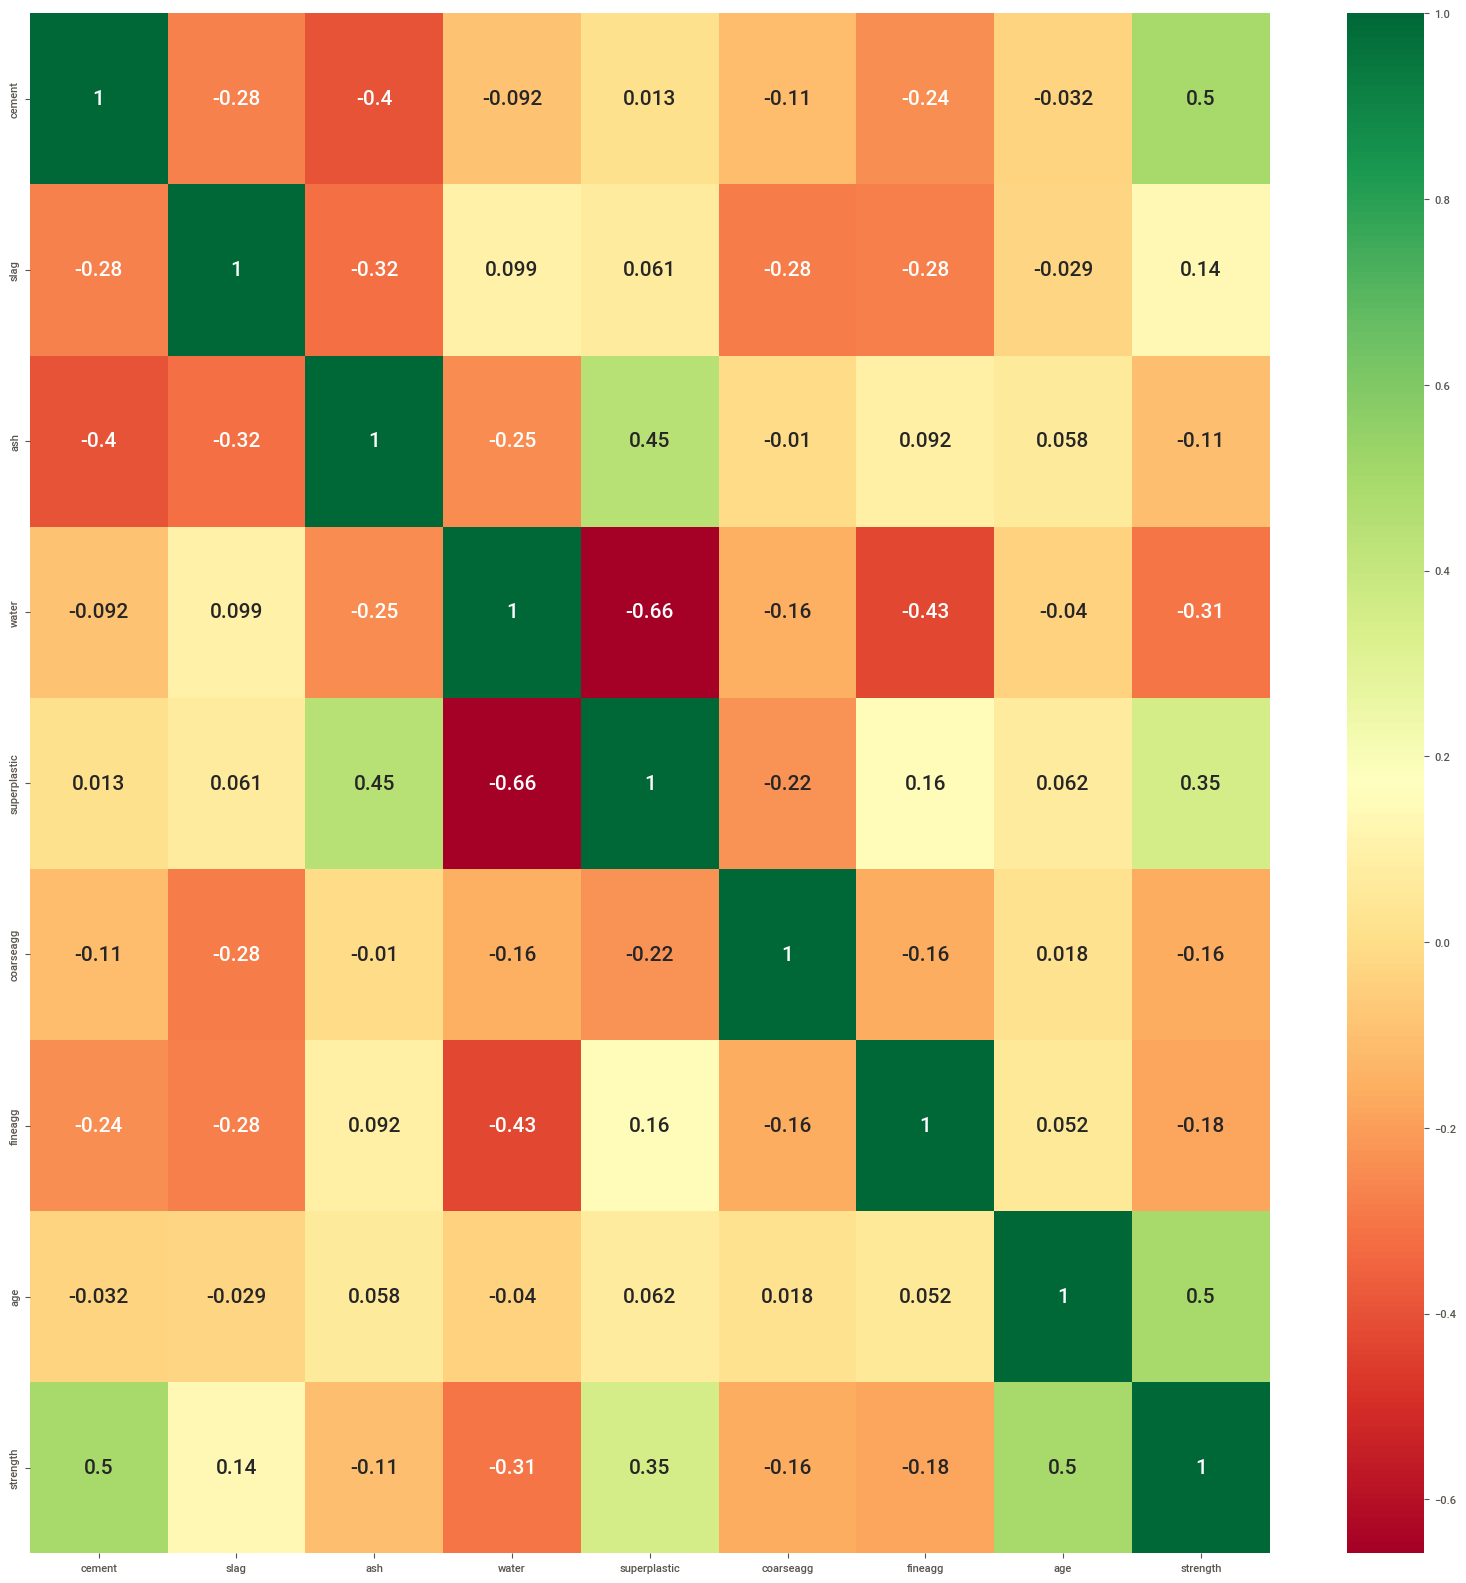

In [50]:
plt.figure(figsize =(20,20))
df.corr()
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', annot_kws ={'size':15})

# Feature selection

Filter Method:
    
    Corrrelation feature selection method:
        
        Correlation-based feature selection is a filter method that assesses the statistical relationship
        between each feature and the target variable. Features with high correlation coefficients 
        (either positive or negative) are considered more relevant. By selecting features with significant correlations,
        this method helps identify those likely to contribute most to the predictive power of a model while reducing dimensionality.

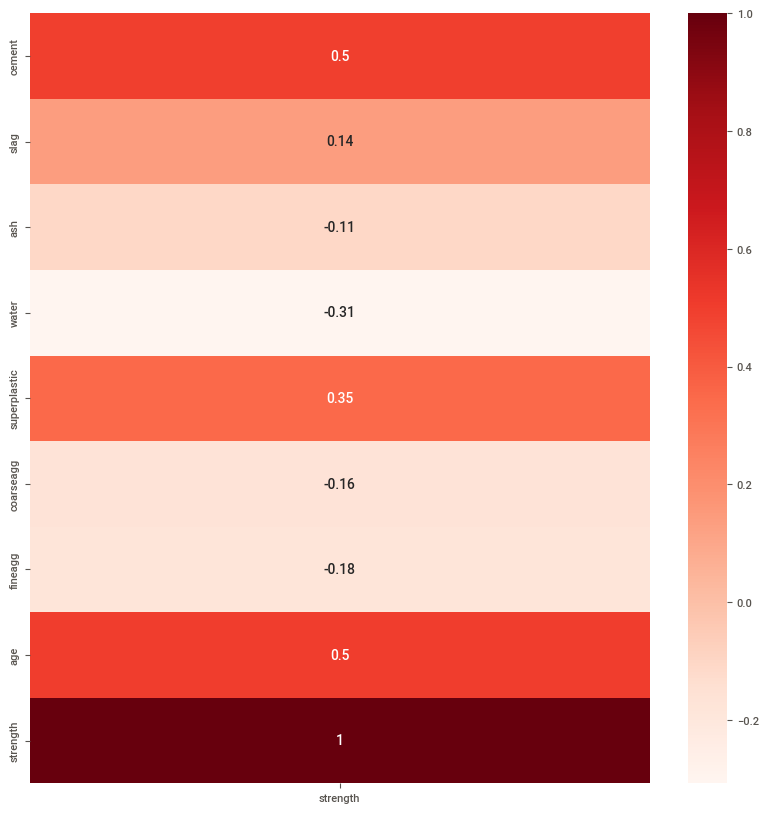

In [51]:
target_correlation = df.corr()[['strength']]
plt.figure(figsize=(10,10))
sns.heatmap(target_correlation, annot = True, cmap = plt.cm.Reds)
plt.show()

In [52]:
# drop the features which have correlation less than 0.3
target_correlation[abs(target_correlation['strength']>=0.3)].dropna()

,strength
cement,0.497832
superplastic,0.346260
age,0.499850
strength,1.000000


# Model Training

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [55]:
x_train.shape, x_test.shape

((772, 8), (258, 8))

In [56]:
y_train.shape,         y_test.shape

((772,), (258,))

# Model building 

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_hat = lr.predict(x_test)

In [61]:
y_hat

array([25.92315141, 46.93972682, 61.87499166, 45.71198132, 16.53916924,
       39.94594998, 26.25063329, 55.60476033, 26.78600522, 54.17084291,
       30.63493367, 19.05605671, 54.38992076, 47.38500288, 24.22312138,
       39.15001694, 31.4034544 , 25.32329262, 34.06204377, 26.72908018,
       37.66822944, 42.47002892, 41.89237128, 21.82469731, 29.34117749,
       31.44380085, 12.05226299, 42.68526177, 53.22396653, 21.10119343,
       39.10187111, 35.14078762, 56.98617081, 57.04015943, 23.42706228,
       35.51420052, 26.37173843, 39.23781605, 16.63691897, 43.1969316 ,
       19.72601944, 11.2553123 , 43.53965823, 47.80273925, 15.38379774,
       61.97759884, 50.08447341, 25.92297202, 23.50865282, 15.88563914,
       41.90069856, 50.06007065, 30.06896017, 28.70564219, 48.94758294,
       45.70997093, 22.48889596, 14.6842947 , 33.41482709, 21.04341311,
       39.0612495 , 21.36954867, 45.15662619, 50.68291415, 25.48171099,
       22.32432527, 32.61197595, 17.57690784, 30.21583555, 22.55

# Model evaluation

Model evaluation is the process of assessing how well a machine learning model performs on a given task.
It involves comparing the model's predictions with the actual outcomes from a dataset. The goal is to understand the model's
accuracy, its ability to generalize to new data, and whether it meets the specific criteria set for a particular application. 
Common metrics, like r2_score,mean_squared_error, mean_absolute error in regression and accuracy, precision, recall, and F1 score, in classification problem,
help quantify the model's performance. Through evaluation, practitioners gain insights into a model's strengths and weaknesses,
enabling informed decisions 
about its suitability for deployment or the need for further refinement.

R-squared (R2) Score:
R-squared measures the proportion of variance in the dependent variable explained by the model.
A higher R2 (closer to 1) indicates a better fit, while 0 suggests the model does not explain variability.
It's a relative measure of how well the model captures the variation in the data.

Mean Squared Error (MSE):
MSE calculates the average squared difference between predicted and actual values.
It penalizes large errors, making it sensitive to outliers. Lower MSE values indicate a better model fit,
with 0 being a perfect fit.


Mean Absolute Error (MAE):
MAE computes the average absolute difference between predicted and actual values.
It provides a measure of average prediction accuracy, not sensitive to the scale of the data.
Lower MAE values indicate better model accuracy.


Adjusted R-squared:
Adjusted R-squared refines R2 by considering the number of predictors in the model. 
It penalizes models with irrelevant predictors, providing a more accurate reflection of the 
model's explanatory power. A higher adjusted R2 accounts for model complexity.

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# r2 score

In [63]:
linear_r2= r2_score(y_test, y_hat)

In [64]:
# R2_Score
print("R2 score for linear_Regression ::",linear_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_hat)
print("Mean_squared_error of Linear_Regression ::",mse)
print()

# mean_absolute_error
mae = mean_absolute_error(y_test, y_hat)
print("Mean_absolute_error of Linear_Regression ::", mae)
print()
# root_mean_squared_error
import math

rmse = math.sqrt(mse)
print('Root_mean_squared_error :: ', rmse)


R2 score for linear_Regression :: 0.690872971946115

Mean_squared_error of Linear_Regression :: 83.73366947729318

Mean_absolute_error of Linear_Regression :: 7.096169587384462

Root_mean_squared_error ::  9.150610333594868


# Using ensemble Technique

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfg = RandomForestRegressor(n_estimators= 1200)

In [67]:
rfg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1200)

In [68]:
y_pred = rfg.predict(x_test)

In [69]:
y_pred

array([48.56070854, 39.8043869 , 72.17134167, 34.75001373, 11.48685   ,
       44.345425  , 24.6528    , 48.28270833, 36.56075   , 41.68095482,
       42.06897958, 16.3454    , 39.10425694, 34.54975   , 23.96566667,
       21.70915   , 36.91386375, 18.469325  , 38.83006702, 31.49255   ,
       36.03320266, 38.74555833, 45.33054167, 10.93675833, 33.45315833,
       38.48162   , 11.20755833, 46.78299488, 53.541275  , 14.73815833,
       63.46981153, 37.12692437, 43.42285458, 48.50469167, 18.26284   ,
       40.68626274, 35.56989167, 44.16934875,  9.57718333, 50.44336667,
       16.21919167,  5.65005833, 40.2842279 , 49.22758014, 13.04059167,
       65.15173333, 53.28288824, 29.24141045, 27.34484396,  8.12778333,
       54.97179758, 43.16084766, 26.32834778, 17.70171667, 46.24340046,
       34.85929278, 27.58951667, 12.069075  , 35.98349167, 19.88771667,
       44.07421333, 14.77628611, 37.11245833, 51.03232833, 35.33642729,
       25.31630556, 37.04639111, 13.41739167, 29.04507118, 23.93

In [70]:
Randomforest_r2 = r2_score(y_test, y_pred)

In [71]:
print("Randomforest_r2_score ::", Randomforest_r2)
print()
mse = mean_squared_error(y_test,y_pred)
print("Mean_squared_error of Random_Forest_Regressor :: ",mse)
print()
# root mean squared error is the square root of mean squared error
rmse = np.sqrt(mse)
print("Root_mean_squqared_error of Random_Froest_Regressor ::",rmse)
print()
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean_Absolute_error of Random_ForestRegressor ::",mae)

Randomforest_r2_score :: 0.8781540752079876

Mean_squared_error of Random_Forest_Regressor ::  33.00457568501915

Root_mean_squqared_error of Random_Froest_Regressor :: 5.744960894994773

Mean_Absolute_error of Random_ForestRegressor :: 3.975880858115112


Baggig Regressor:
    Bagging (Bootstrap Aggregating):
        
    Bagging is an ensemble technique that involves training multiple instances of the same learning algorithm on 
    different subsets of the training data, sampled with replacement. The final prediction is often an average or voting
    mechanism, reducing variance and improving model robustness.

# Bagging Regressor

In [72]:
from sklearn.ensemble import BaggingRegressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

Decision Tree Regressor:
    Decision Tree Regressor is a non-linear predictive model that maps features to target values by recursively 
    partitioning the input space into regions. It makes predictions by averaging the target values of data points within
    the leaf node to which a given input belongs.

In [74]:
# Create a base regressor (DecisionRegressor in this model)
base_regressor = DecisionTreeRegressor()


In [75]:
bagg_model = BaggingRegressor(base_regressor, n_estimators= 1200, random_state = 42)

In [76]:
bagg_model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=1200,
                 random_state=42)

In [77]:
y_prediction = bagg_model.predict(x_test)

In [78]:
y_prediction

array([48.48710412, 39.25974444, 72.23678333, 34.56693069, 11.49090833,
       44.01126806, 24.739375  , 48.57593333, 36.41725833, 41.67736847,
       42.00821791, 16.51774167, 38.97513222, 34.91876667, 23.66995833,
       21.802875  , 36.98737028, 18.574925  , 38.6342131 , 31.724425  ,
       35.94036411, 38.638875  , 45.38922083, 10.804625  , 33.674925  ,
       38.29232619, 11.253525  , 46.44260889, 53.51008333, 14.90960833,
       62.97191167, 37.2536838 , 43.77678898, 49.45119167, 18.22490833,
       40.71306143, 35.53129167, 43.766175  ,  9.6035    , 50.77090833,
       16.27134167,  5.51370833, 40.57749192, 49.13137167, 12.96535833,
       65.25356667, 52.66573292, 29.30461595, 27.28076488,  8.10165   ,
       54.5572241 , 43.36182833, 26.23007028, 17.60013333, 46.13813528,
       34.88431653, 27.45581667, 12.16500833, 36.18376667, 20.01769931,
       43.667425  , 14.760575  , 37.45106667, 51.170515  , 35.59476027,
       24.48896111, 36.7464349 , 13.41305833, 29.10058681, 23.81

In [79]:
BaggingRegressor_r2 = r2_score(y_test, y_prediction)

In [80]:
# r2_score
print("BaggingRegressor_r2_score ::",BaggingRegressor_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_prediction)
print("Bagging Regressor mean_square_error ::",mse)
print()
# root_mean_squared_error
rmse = math.sqrt(mse)
print("root_mean_squared_error ::", rmse)
print()
# mean_absolute_error
mae = mean_absolute_error(y_test, y_prediction)
print("Mean_absolute_error ::",mae)

# adjust

BaggingRegressor_r2_score :: 0.879673784118709

Bagging Regressor mean_square_error :: 32.59293001161055

root_mean_squared_error :: 5.7090218086473055

Mean_absolute_error :: 3.968637004321328


In [81]:
# Cross_validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(bagg_model, x,y, cv = 3, scoring = 'r2')
print("Cross_validation_score ::", score)
print()
print("Mean of cross_val_score ::", score.mean())
print()
print("Std of cross_val_Score ::", score.std())

Cross_validation_score :: [ 0.68695339  0.75662291 -0.12151682]

Mean of cross_val_score :: 0.44068649358843764

Std of cross_val_Score :: 0.3985539552649661


# Hyper parameter tuning for RandomForestRegressor


In [82]:
# Randomized Search CV is a hyperparameter tuning technique that randomly selects
# combinations of hyperparameter values from predefined ranges. It helps efficiently
# explore a wide range of hyperparameter space, finding optimal configurations for
# machine learning models without exhaustive search.

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# max_features = ['auto','sqrt']
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# min_samples_split = [2,5,10,15,100]
# min_samples_leaf = [1,2,5,10]
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=2000, num=20)],  # Increase the range of n_estimators
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],  # Allow deeper trees
    'min_samples_split': [2, 5, 10, 15, 100],  # Include smaller values
    'min_samples_leaf': [1, 2, 4,12],  # Include smaller values
}

Random Forest Regressor:
    
Random Forest Regressor is an ensemble learning method that builds a multitude of decision trees 
during training and outputs the average prediction of the individual trees for regression tasks.
It enhances predictive accuracy and reduces overfitting by combining the predictions from multiple trees.

In [85]:
rf_reg = RandomForestRegressor()

In [86]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = param_grid,
                              scoring = 'r2',n_iter = 100, cv = 5,
                               verbose = 3,n_jobs = -1)

In [87]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100,
                                                      110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 12],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   scoring='r2', verbose=3)

In [88]:
# best params given by hyperparameter
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90}

In [89]:
rf_reg = RandomForestRegressor(n_estimators= 1500,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 70)

In [90]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=70, max_features='sqrt', n_estimators=1500)

In [91]:
y_prd = rf_reg.predict(x_test)

In [92]:
y_prd

array([48.57170835, 39.42356476, 68.654785  , 35.54710476, 13.67724667,
       44.15660667, 26.03777556, 46.29882667, 33.72441556, 41.03448744,
       38.95233156, 16.33393333, 44.58595167, 37.77750889, 27.77856667,
       22.91901667, 38.38700111, 17.45467   , 37.48340067, 30.84518444,
       33.74069478, 36.98036933, 45.38920167, 13.5072    , 32.07024222,
       36.63248984, 11.97890667, 42.56758667, 51.11164   , 16.59966333,
       53.51585   , 36.24068557, 43.01383786, 47.47428667, 23.41005778,
       40.53941084, 33.98388889, 42.225785  , 13.14238667, 50.44874667,
       16.68218   ,  8.37507333, 39.43615614, 46.90282622, 14.52834667,
       63.95448667, 44.23401144, 29.01055812, 27.08307296, 10.37325333,
       52.89048444, 39.54344711, 25.275079  , 18.14059333, 46.24648805,
       38.83451889, 25.61818   , 12.65926667, 34.80777333, 19.46332833,
       42.22893167, 18.05296556, 36.42814667, 47.65062857, 31.98283659,
       22.02195667, 36.10048867, 16.81245233, 29.37504733, 23.38

In [93]:
RandomForestRegressor_hyper_r2 = r2_score(y_test, y_prd)

In [94]:
# RandomForestRegressor_hyper_r2_score
print("RandomForestRegressor_hyper_r2_score ::",RandomForestRegressor_hyper_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_prd)
print("Random_Forest_Regressor_hyper_mse ::",mse)
print()

# Root mean_squared_error
rmse= math.sqrt(mse)
print("Root_mean_squared_error Randomforest_hyper :",rmse)
print()
# mean_absolute_error
mae = mean_absolute_error(y_test, y_prd)
print("Mean_absolute_error  ::",mae)

RandomForestRegressor_hyper_r2_score :: 0.8758760183676084

Random_Forest_Regressor_hyper_mse :: 33.621636120412546

Root_mean_squared_error Randomforest_hyper : 5.79841669082281

Mean_absolute_error  :: 4.163746614112722


# cross_val_score

In [95]:
score = cross_val_score(rf_reg, x,y, cv =3, scoring = 'r2')
print("Cross_val_Score ::",score)
print("CV mean value ::", score.mean())
print("CV std ::",score.std())

Cross_val_Score :: [0.71907235 0.75492295 0.11206571]
CV mean value :: 0.5286870035099192
CV std :: 0.294959083353332


# ANN MLPREGRESSOR

In [96]:
# ANN MLPREGRESSOR
from sklearn.neural_network  import MLPRegressor

In [97]:
model = MLPRegressor( hidden_layer_sizes=(100, 50),  # Adjust layer sizes based on complexity
        activation='relu',# 'relu' is commonly used
        solver = 'adam',
        max_iter=1200,  # Increase max_iter for more training epochs
        random_state=42
    )

In [98]:
model.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1200, random_state=42)

In [99]:
predicted = model.predict(x_test)

In [100]:
predicted

array([30.31831715, 51.57688325, 66.49259198, 50.22670695, 17.89257276,
       45.01467004, 28.01216027, 56.01996729, 30.0289445 , 51.43569759,
       32.154181  , 18.00999814, 50.36028115, 47.6602781 , 25.96931963,
       35.55841385, 34.69557286, 28.04459999, 38.49322084, 26.79750507,
       40.57442462, 39.72711714, 45.02185445, 19.75700284, 32.66090293,
       35.54355307, 13.89521416, 44.86631203, 56.32803985, 21.17694596,
       40.60176419, 33.44321343, 57.53265418, 60.57369257, 22.94077984,
       35.71063113, 29.54224058, 44.63142383, 17.6546093 , 47.14465667,
       21.96330163, 12.44000934, 45.27823881, 49.68684043, 17.84483014,
       67.67661625, 50.97185681, 26.18676817, 24.67141289, 15.76497345,
       46.11851615, 55.64300249, 30.20015353, 26.26545921, 49.38296941,
       49.81226314, 26.53475049, 14.6881632 , 35.23419852, 21.67065477,
       44.43246379, 19.55247394, 47.81701005, 51.27184591, 31.59122596,
       21.00168255, 34.96237611, 18.44336623, 30.9235271 , 26.10

In [101]:
Ann_r2 = r2_score(y_test, predicted)

In [102]:
# R2 score
print("ANN Regressor r2_score ::",Ann_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, predicted)
print("Mean_squred_error of ANN regressor :: ",mse)
print()

# rmse
# root_mean_squared_error is square root of mean_squared_error
rmse = math.sqrt(mse)
print("root_mean_squared_error ::", rmse)
print()

# mean_absolute_error
mae = mean_absolute_error(y_test, predicted)
print("Mean_absolute_error ::", mae)

ANN Regressor r2_score :: 0.7332712780832948

Mean_squred_error of ANN regressor ::  72.24918112686377

root_mean_squared_error :: 8.499951830855501

Mean_absolute_error :: 6.775306385297895


# XGBRegressor

XGBoost, or Extreme Gradient Boosting, is a powerful machine learning library widely used for regression and 
classification tasks.


Gradient Boosting Algorithm:
    XGBoost employs a gradient boosting framework, combining multiple weak learners (typically decision trees) sequentially 
    to improve predictive performance.


Regularization Techniques:
    It integrates regularization techniques, such as L1 and L2 regularization, to prevent overfitting and
    enhance model generalization.


Tree Pruning and Parallel Processing:
    XGBoost implements tree pruning and parallel processing, optimizing the training process for increased speed and efficiency.


Handling Missing Data:
    It effectively handles missing data, allowing the algorithm to make predictions even when some features are incomplete.


Widely Adopted:
    XGBoost has gained popularity for its high accuracy and efficiency, winning numerous machine learning competitions and being widely used in various domains.

In [103]:
from xgboost import XGBRegressor

In [104]:
xgb = XGBRegressor()

In [105]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Testing score 

In [106]:
y_predicted = xgb.predict(x_test)

In [107]:
xgb_r2_score = r2_score(y_test, y_predicted)

In [108]:
# xgb r2_score
print("xgb_r2_score ::",xgb_r2_score)
print()

# adjusted_r2 score
adjusted_r2 = 1-(1-0.90)*(258-1)/(258-8-1)
print("adjusted_r2_score ::",adjusted_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_predicted)
print("mean_squared_error ::",mse)
print()

# root mean squared_error
# Root_mean_squared_error
rmse = math.sqrt(mse)
print("root_mean_squared_error ::",rmse)
print()

# mean_absolute_error
mae = mean_absolute_error(y_test, y_predicted)
print("mean_squared_error ::", mae)

xgb_r2_score :: 0.8936763043781095

adjusted_r2_score :: 0.8967871485943775

mean_squared_error :: 28.800047808358592

root_mean_squared_error :: 5.366567600278468

mean_squared_error :: 3.468904750143835


# cross_val_score of xgbregressor

In [109]:
score = cross_val_score(xgb, x,y, cv = 3, scoring = 'r2')
print("Cross validation score ::",score)
print("CV score mean ::", score.mean())
print("CV score.std() ::",score.std() )

Cross validation score :: [0.67697677 0.75646863 0.19453642]
CV score mean :: 0.5426606088630576
CV score.std() :: 0.24829092595399713


# Hyper parameter tuning for XGBregressor

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
params = {
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
}

xgb_reg = XGBRegressor(random_state = 10,verbosity = 0,silent= 0)

rcv_xgb = RandomizedSearchCV(estimator = xgb_reg, scoring = 'neg_mean_squared_error',param_distributions = params,
                             n_iter = 100,random_state = 42,cv = 3, n_jobs = -1, verbose = 2)

In [112]:
rcv_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [113]:
# best parameter
rcv_xgb.best_params_

{'reg_lambda': 0.4,
 'reg_alpha': 1.6,
 'n_estimators': 130,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.4}

In [114]:
# best estimator
print("Best estimators ::", rcv_xgb.best_estimator_)

Best estimators :: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=130, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)


In [115]:
hyper_xgb = XGBRegressor(reg_lambda= 0.8,
 reg_alpha= 0.8,
 n_estimators= 115,
 max_depth = 6,
 learning_rate = 0.300000012,
 gamma = 12.8)

In [116]:
hyper_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=12.8, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.300000012,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=115, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [117]:
y_hyper_xgb = hyper_xgb.predict(x_test)

In [118]:
y_hyper_xgb

array([47.90759  , 42.85232  , 75.248795 , 33.57772  , 11.116227 ,
       42.695038 , 24.62022  , 47.47206  , 35.956337 , 39.792988 ,
       43.102226 , 17.832916 , 39.15212  , 42.739582 , 25.84362  ,
       25.907898 , 36.370968 , 21.404781 , 35.664536 , 33.280785 ,
       32.655376 , 38.213154 , 47.83191  ,  8.572198 , 36.86824  ,
       35.716274 ,  9.663488 , 48.074364 , 54.82661  , 13.788863 ,
       52.754597 , 37.687725 , 43.042336 , 47.138657 , 19.666458 ,
       40.187824 , 35.30999  , 42.346188 , 10.005447 , 52.039433 ,
       14.6757555,  7.410728 , 45.38215  , 49.47431  , 11.508971 ,
       68.98359  , 53.70299  , 28.89832  , 26.64398  ,  7.04864  ,
       53.196068 , 46.422802 , 25.194859 , 17.398794 , 52.975986 ,
       35.98322  , 26.248022 , 10.431854 , 30.048258 , 19.804182 ,
       42.346188 , 16.251808 , 36.82831  , 46.897717 , 28.133053 ,
       27.597229 , 36.666172 , 12.627385 , 30.794622 , 24.86117  ,
       11.298669 , 26.348347 ,  9.158568 , 43.102226 , 26.2236

In [119]:
r2  = r2_score(y_test, y_hyper_xgb)

In [120]:
print("r2_score of xgb :", r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_hyper_xgb)
print("Mean squared error of xgb ::", mse)
print()
# rmse
rmse = np.sqrt(mse)
print("Root mean square error of xgb :", rmse)
print()
# mean absolute_ error
mae = mean_absolute_error(y_test, y_hyper_xgb)
print("Mean absolute error of xgb ::", mae)

r2_score of xgb : 0.8914194004492428

Mean squared error of xgb :: 29.411378525091614

Root mean square error of xgb : 5.423225841239844

Mean absolute error of xgb :: 3.6412631461786673


# cross_validation_score for xgb

In [121]:
scores = cross_val_score(hyper_xgb, x,y, cv= 3, scoring = 'r2')
print("Cross_validation_scores ::",scores)
print("Cross_validation_scores  mean value::",scores.mean())
print("Cross_validation_scores  std value::",scores.std())

Cross_validation_scores :: [0.6740359  0.73371228 0.21046767]
Cross_validation_scores  mean value:: 0.5394052815773979
Cross_validation_scores  std value:: 0.2338664629607135


# Cross validation score

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
score = cross_val_score(xgb, x,y, cv =3, scoring = 'r2')
print(score)
print("Cross validation score mean :>: ", score.mean())
print("standard deviation :> ", score.std())

[0.67697677 0.75646863 0.19453642]
Cross validation score mean :>:  0.5426606088630576
standard deviation :>  0.24829092595399713


# KNN  Regressor

In [124]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

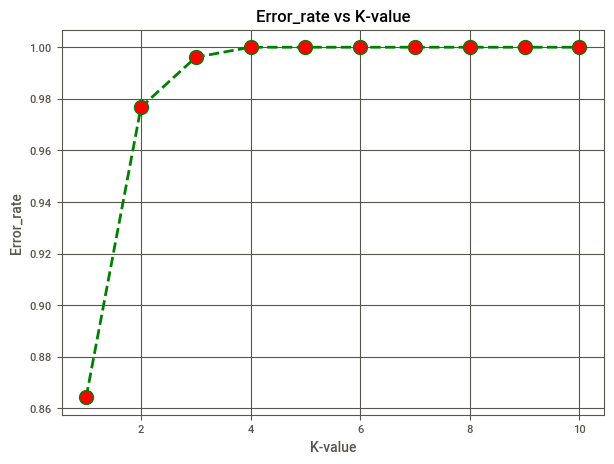

In [125]:
error_rate = []

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))  # Calculate the mean error rate
    
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), error_rate, color='green', linestyle='--', linewidth=2,marker = 'o', markersize = 10, markerfacecolor = 'red')
plt.title('Error_rate vs K-value')
plt.xlabel('K-value')
plt.ylabel("Error_rate")
plt.grid()

In [126]:
error_rate

[0.8643410852713178,
 0.9767441860465116,
 0.9961240310077519,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [127]:
knn = KNeighborsRegressor(n_neighbors=6)

In [128]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [129]:
y_predict_val = knn.predict(x_test)

In [130]:
y_predict_val

array([48.67833333, 48.66666667, 65.49833333, 44.48333333, 12.74833333,
       41.05166667, 33.22166667, 47.255     , 28.67      , 38.405     ,
       38.20833333, 18.61333333, 51.18333333, 45.37166667, 29.02666667,
       28.35166667, 32.72333333, 21.82666667, 35.92166667, 32.29833333,
       33.29666667, 41.475     , 42.57333333, 26.51      , 36.47166667,
       32.10833333, 14.735     , 36.46166667, 47.69833333, 27.84166667,
       36.89833333, 28.16833333, 31.97666667, 46.80833333, 32.29833333,
       39.92666667, 28.36166667, 42.52333333, 16.3       , 42.755     ,
       17.75666667, 11.79333333, 36.98666667, 37.39333333, 19.17333333,
       72.53166667, 40.79333333, 23.285     , 23.285     , 23.93333333,
       54.25166667, 38.95666667, 29.755     , 27.47166667, 61.93333333,
       42.78166667, 19.16333333, 16.33833333, 35.18666667, 16.33833333,
       42.52333333, 20.61666667, 41.03      , 54.45      , 18.71666667,
       17.55166667, 44.235     , 16.09166667, 31.285     , 20.89

In [131]:
knn_r2_score = r2_score(y_test, y_predict_val)

In [132]:
# r2_score
print("knn_r2_score ::",knn_r2_score)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_predict_val)
print("mean_squared_error ::", mse)
print()

# root_mean_squared_error
rmse = math.sqrt(mse)
print('root_mean_squared_error ::', rmse)
print()

# mean_absolute_error
mae = mean_absolute_error(y_test, y_predict_val)
print("Mean_absolute_error ::", mae)

knn_r2_score :: 0.6874288246930973

mean_squared_error :: 84.66659045004307

root_mean_squared_error :: 9.201445019671805

Mean_absolute_error :: 7.256776485788114


# KNN hyper parameter tuning

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
param_gd = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme ('uniform' or 'distance')
    'p': [1, 2]  # Power parameter for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}


knn_rand = RandomizedSearchCV(estimator = knn,param_distributions = param_gd, n_iter = 100, scoring = 'neg_mean_squared_error',
                             cv = 5, verbose = 3,n_jobs = -1, random_state = 42)

In [135]:
knn_rand.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=6),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [136]:
y_knn = knn_rand.predict(x_test)

In [137]:
r2  = r2_score(y_test,y_knn )

In [138]:
print("r2_score of knn_hyper parameter ::",r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_knn)
print("mean_squared_Error :",mse)
print()

# rmse
rmse = np.sqrt(mse)
print("Root mean_squared_error ::", rmse)
print()

# mean_absolute_error
mae = mean_absolute_error(y_test, y_knn)
print("mean_absolute_error ::", mae)

r2_score of knn_hyper parameter :: 0.7707812541927774

mean_squared_Error : 62.08880155272609

Root mean_squared_error :: 7.87964476056669

mean_absolute_error :: 5.7333199631978005


# Support Vector Regression

In [139]:
from sklearn.svm import SVR

In [140]:
svr = SVR()

In [141]:
svr.fit(x_train,y_train)

SVR()

In [142]:
y_pred_svr = svr.predict(x_test)

In [143]:
y_pred_svr

array([35.65833253, 39.26673474, 40.80781631, 39.185908  , 28.88632552,
       35.81846565, 31.15380127, 32.33659704, 29.36876604, 38.81582521,
       33.79526819, 31.24142616, 42.08179414, 39.94083475, 29.33248054,
       37.12001037, 35.76287015, 34.90380538, 35.91643176, 30.61147187,
       35.93322576, 29.16934077, 33.69406094, 33.17417386, 30.98069856,
       30.94321457, 29.06394642, 37.28994621, 31.72824873, 34.8326069 ,
       37.26880634, 37.57159144, 37.60757959, 32.3803069 , 30.49059463,
       39.19359061, 29.3275619 , 35.26453064, 30.39611727, 34.11377622,
       32.40026405, 29.06160503, 32.93195893, 37.16456193, 30.35132957,
       40.78959732, 37.8290532 , 33.87414614, 33.50988147, 31.1716406 ,
       38.19086382, 35.48013518, 33.74800243, 33.65317001, 41.91216376,
       39.72986574, 29.0880391 , 30.48526444, 29.42765681, 30.91182523,
       35.24413538, 35.02761057, 32.34989862, 40.03102767, 33.01923155,
       29.07731688, 34.40749261, 28.01371902, 31.41748077, 31.40

In [144]:
svr_r2 = r2_score(y_test, y_pred_svr)

In [145]:
# support vector r2_score
print("SVR_R2_score ::",svr_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_pred_svr)
print("Mean_squared_error ::", mse)
print()

# root mean squared error
rmse = math.sqrt(mse)
print("Root_mean_squared_error ::", rmse)
print()

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred_svr)
print("Mean_absolute_error ::", mae)

SVR_R2_score :: 0.21956800142403088

Mean_squared_error :: 211.39670455108967

Root_mean_squared_error :: 14.539487767837272

Mean_absolute_error :: 11.798373480749088


# Hyper parameter tuning for svm
svr

In [146]:
param_grid = {
    'C' :[0.1,5,10,50,60,70],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
model = SVR()
grid = GridSearchCV(model, param_grid,refit = True, verbose = 2, cv = 5)

In [149]:
grid.fit(x,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [150]:
# print best parameter after tuning
print(grid.best_params_)

# print my model look like after hyper parameter tuning
print(grid.best_estimator_)

{'C': 70, 'gamma': 0.0001}
SVR(C=70, gamma=0.0001)


In [151]:
svr_model= SVR(C=10, gamma=0.0001,kernel = 'rbf')

In [152]:
svr_model.fit(x_train,y_train)

SVR(C=10, gamma=0.0001)

In [153]:
y_svr_predict =svr_model.predict(x_test)

In [154]:
svr_hyper_r2 = r2_score(y_test, y_svr_predict)

In [155]:
# r2_score
print("Svr_hyper_r2_score  ::",svr_hyper_r2)
print()


# mean_squared_error
mse = mean_squared_error(y_test, y_svr_predict)
print("Mean_squared_error ::", mse)
print()

# root_mean_squared_error
rmse = math.sqrt(mse)
print("root_mean_squared_error ::", rmse)
print()

# mean_absolute_error
mae = mean_absolute_error(y_test, y_svr_predict)
print("mean_asolute_error ::", mae)

Svr_hyper_r2_score  :: 0.7880559893517926

Mean_squared_error :: 57.409569933223025

root_mean_squared_error :: 7.576910315770078

mean_asolute_error :: 5.779648779432001


# cross_val_score

In [156]:
# cross_val_score for svr
score = cross_val_score(svr_model,x,y,cv = 3, scoring = 'r2')
print("Cross validation score ::", score)
print("CV score mean ::",score.mean())
print("Cv score std :",score.std())

Cross validation score :: [0.3034691  0.54836906 0.46754961]
CV score mean :: 0.4397959234849849
Cv score std : 0.10188784194893917


# Decision Tree Regressor

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [159]:
y_pred_dtree = dtree.predict(x_test)

In [160]:
y_pred_dtree

array([48.76      , 39.4       , 71.3       , 35.3       , 10.54      ,
       44.28      , 23.7       , 47.74      , 38.5       , 39.49      ,
       44.39      , 15.75      , 40.6       , 42.8       , 17.82      ,
       25.42      , 40.06      , 23.52      , 37.17      , 34.24      ,
       32.05      , 40.57      , 45.08      ,  4.9       , 33.73      ,
       33.94      ,  7.84      , 79.99      , 51.26      , 12.54      ,
       70.74      , 39.58      , 47.71      , 47.82      , 20.73      ,
       39.78      , 38.5       , 28.63      , 10.39      , 56.74      ,
       17.54      ,  4.78      , 43.25      , 56.34      , 13.36      ,
       61.09      , 55.65      , 27.53      , 26.74      ,  9.69      ,
       57.22      , 50.53      , 24.34      , 17.2       , 43.94      ,
       35.3       , 33.73      , 11.48      , 33.56      , 19.69      ,
       28.63      , 15.62      , 33.54      , 59.09      , 32.63      ,
       18.03      , 32.4       , 12.18      , 29.45      , 20.73

In [161]:
decisiontree_r2_score = r2_score(y_test, y_pred_dtree)

In [162]:
# r2_score for DecisionTreeRegressor
print("decisiontree_r2_score ::",decisiontree_r2_score)
print()

# adjusted_r2_score of decisionTreeRegressor
adjusted_r2 = 1-(1-0.809)*(258-1)/(258-8-1)
print("adjusted_r2 of decision_tree_regressor ::", adjusted_r2)
print()

# mean_squared_error of descision_tree_regressor
mse = mean_squared_error(y_test, y_pred_dtree)
print("mean_squared_error ::",mse)
print()

# root_mean_squared_error
rmse = np.sqrt(mse)
print("Root mean squared error of decision_tree_error ::" ,rmse)
print()

# mean_absolute_error of decisionTreeRegressor
mae = mean_absolute_error(y_test, y_pred_dtree)
print("Mean_absolute_error of decicion_tree_reressor ::", mae)


decisiontree_r2_score :: 0.765784915188498

adjusted_r2 of decision_tree_regressor :: 0.802863453815261

mean_squared_error :: 63.44216687123169

Root mean squared error of decision_tree_error :: 7.965059125407149

Mean_absolute_error of decicion_tree_reressor :: 4.853016795865633


# Hyper parameter tuning for DecisionTreeRegressor

In [163]:
from sklearn.model_selection import  GridSearchCV

In [164]:
params = {
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 20)),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': list(range(1, 20))
}


tree_reg = DecisionTreeRegressor(random_state = 3)
tree_reg  = GridSearchCV(tree_reg, params, scoring = 'neg_mean_squared_error', verbose = 3, n_jobs = -1,cv = 3)
tree_reg.fit(x_train,y_train)

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=3), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [165]:
# best parameter
print(tree_reg.best_params_)

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [166]:
# best estimators
print(tree_reg.best_estimator_)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=4, random_state=3,
                      splitter='random')


In [167]:
tun_tree= DecisionTreeRegressor(max_depth=16, min_samples_split=3, random_state=3,
                      splitter='random')

In [168]:
tun_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_split=3, random_state=3,
                      splitter='random')

In [169]:
y_tun_pred = tun_tree.predict(x_test)

In [170]:
y_tun_pred

array([48.76      , 39.4       , 51.45      , 35.3       , 10.54      ,
       44.28      , 23.7       , 51.06      , 26.2       , 37.57      ,
       36.8       , 12.525     , 38.55      , 42.8       , 23.51      ,
       21.82      , 40.37      , 15.03      , 34.785     , 30.68      ,
       35.92      , 55.54      , 44.8       ,  2.825     , 38.77      ,
       35.865     , 12.73      , 59.4       , 58.61      , 14.31      ,
       64.61      , 37.11190476, 50.73      , 46.23      , 17.62      ,
       38.75      , 26.2       , 49.77      , 10.74      , 43.085     ,
       17.54      ,  8.875     , 38.725     , 46.68      , 10.76      ,
       59.89      , 55.65      , 27.2375    , 27.2375    ,  2.825     ,
       65.66      , 45.385     , 26.97      , 15.75      , 56.735     ,
       40.65      , 26.18      , 11.765     , 36.95      , 19.69      ,
       49.77      , 15.865     , 45.385     , 49.2       , 41.68      ,
       18.03      , 41.54      , 12.18      , 29.45      , 21.52

In [171]:
r = r2_score(y_test, y_tun_pred)
print(r)

0.7911180129914553


In [172]:
hyper_tun_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=2, splitter='random')


In [173]:
hyper_tun_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, splitter='random')

In [174]:
pred_tree= hyper_tun_tree.predict(x_test)

In [175]:
Decision_tree_r2 = r2_score(y_test, pred_tree)
print("Decision_tree_r2_score ::",Decision_tree_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, pred_tree)
print("Mean squared error of Decision tree regressor  ::",mse)
print()

# root mean_squared_error
rmse = np.sqrt(mse)
print("Root mean_squared_error ::", rmse)
print()

# mean_sqaured_error
mae = mean_absolute_error(y_test, pred_tree)
print("Mean_absolute_error ::", mae)

Decision_tree_r2_score :: 0.818529486016509

Mean squared error of Decision tree regressor  :: 49.15517136573195

Root mean_squared_error :: 7.011074908010323

Mean_absolute_error :: 4.766409283868586


# GRadient boosting Regressor

In [176]:
from sklearn.ensemble import GradientBoostingRegressor

In [177]:
gbr = GradientBoostingRegressor(n_estimators = 1200, random_state = 42)

In [178]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1200, random_state=42)

In [179]:
y_gbr = gbr.predict(x_test)

In [180]:
gbr_r2 = r2_score(y_test, y_gbr)
print("Gradient boosting regressor r2_score ::", gbr_r2)
print()

# mean_squared_error
mse = mean_squared_error(y_test, y_gbr)
print("Mean squared error gbr  ::", mse)
print()

# root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error  rmse ::", rmse)
print()
# mean_absolute_error
mae = mean_absolute_error(y_test, y_gbr)
print("mean_absolute_error mae ::", mae)

Gradient boosting regressor r2_score :: 0.9237052456476708

Mean squared error gbr  :: 20.666066581132526

Root mean squared error  rmse :: 4.545994564573579

mean_absolute_error mae :: 3.0944126299516856


# Hyper parameter for GradientBoostingRegressor

In [181]:
gb_regressor = GradientBoostingRegressor(
    loss='squared_error',  # loss function
    learning_rate=0.1,  # Controls the contribution of each tree
    n_estimators=1200,  # Number of boosting stages to be run
    max_depth=3,  # Maximum depth of the individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    random_state=42  # For reproducibility
)

In [182]:
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1200, random_state=42)

In [183]:
prediction_gb = gb_regressor.predict(x_test)

In [184]:
prediction_gb

array([48.97564269, 43.91102742, 73.58538261, 33.4477648 , 10.34935734,
       43.22098507, 23.16424335, 49.38458496, 33.99214879, 43.44923964,
       36.67095504, 11.69112418, 38.39387029, 46.93298   , 27.63534088,
       23.88125999, 37.3749113 , 19.73838476, 36.7560857 , 33.61627691,
       36.14370688, 37.49262163, 47.69713931,  6.29899346, 37.0660844 ,
       33.84530253,  8.28272263, 43.40026656, 56.36840587, 15.1319998 ,
       44.72385769, 38.40337475, 48.31269721, 60.01313639, 19.0086769 ,
       39.07132051, 30.71439071, 43.19559319, 13.39103758, 51.18468862,
       16.74986234,  5.49737633, 42.42155392, 48.90779389, 12.72592017,
       69.74913371, 49.8978001 , 29.15466199, 25.46721946,  5.54297275,
       55.07456924, 43.44590432, 20.3989477 , 14.21537153, 44.19106292,
       31.36854278, 27.25855787,  9.44563359, 34.33114856, 20.9247972 ,
       43.38137042, 15.25258492, 36.95602968, 52.39194031, 31.44308501,
       21.10375843, 35.08144019, 12.29656778, 30.21684131, 25.15

In [185]:
# r2_score gradient boosting Regressor
gbr_r2= r2_score(y_test, prediction_gb)
print("Gradient Boosting Regressor_r2_score ::",gbr_r2)
print()

# mean_squared_error of gradient boosting Regressor
mse = mean_squared_error(y_test, prediction_gb)
print("mean_squared_error of gradient_Boosting_Regressor ::",mse)
print()

# root mean_squared_error
rmse = np.sqrt(mse)
print("Root mean_squared_error of Gradient Boosting Regressor ::", rmse)
print()

# mean_absolute error
mae = mean_absolute_error(y_test, prediction_gb)
print("mean_absolute_error of gradient boosting regressor ::", mae)

Gradient Boosting Regressor_r2_score :: 0.9237052456476708

mean_squared_error of gradient_Boosting_Regressor :: 20.666066581132526

Root mean_squared_error of Gradient Boosting Regressor :: 4.545994564573579

mean_absolute_error of gradient boosting regressor :: 3.0944126299516856


#### Actual Values and Predicted Values:

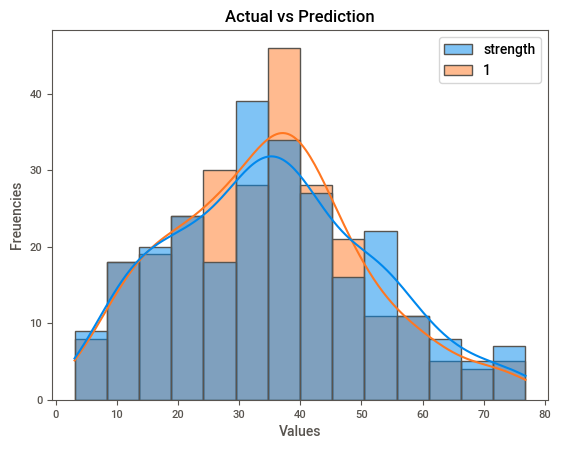

In [186]:
sns.histplot([y_test, prediction_gb], kde = True)
plt.xlabel('Values')
plt.ylabel('Freuencies')
plt.title('Actual vs Prediction')
plt.show()

# regression line

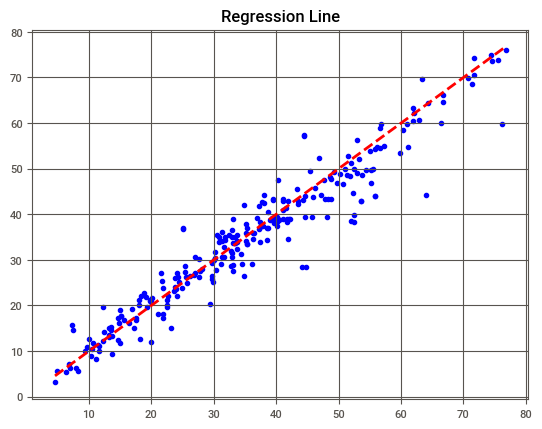

In [187]:
plt.scatter(y_test,prediction_gb , color = 'blue', label = 'Actual vs Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color = 'red', linestyle = '--', linewidth = 2,
         label  = 'Regression_line')
plt.title("Regression Line")
plt.grid()
plt.show()

# Model summary

In [188]:
data = {
    'Model':['LR','KNN','SVM','DT','RF','Bagging','ANN','GB','XGB'],
    'MSE':[58.91,111.56,140.49,56.31,32.28,32.19,44.49,21.01,25.56],
    'R2_Score':[0.78,0.58,0.44,0.81,0.88,0.88,0.83,0.92,0.91],
    'MAE':[5.97,8.22,9.61, 4.90,3.93,3.92,5.30,3.15,3.47]
}
compiled_results = pd.DataFrame(data)
compiled_results.set_index('Model', inplace=True)
print(compiled_results)

            MSE  R2_Score   MAE
Model                          
LR        58.91      0.78  5.97
KNN      111.56      0.58  8.22
SVM      140.49      0.44  9.61
DT        56.31      0.81  4.90
RF        32.28      0.88  3.93
Bagging   32.19      0.88  3.92
ANN       44.49      0.83  5.30
GB        21.01      0.92  3.15
XGB       25.56      0.91  3.47


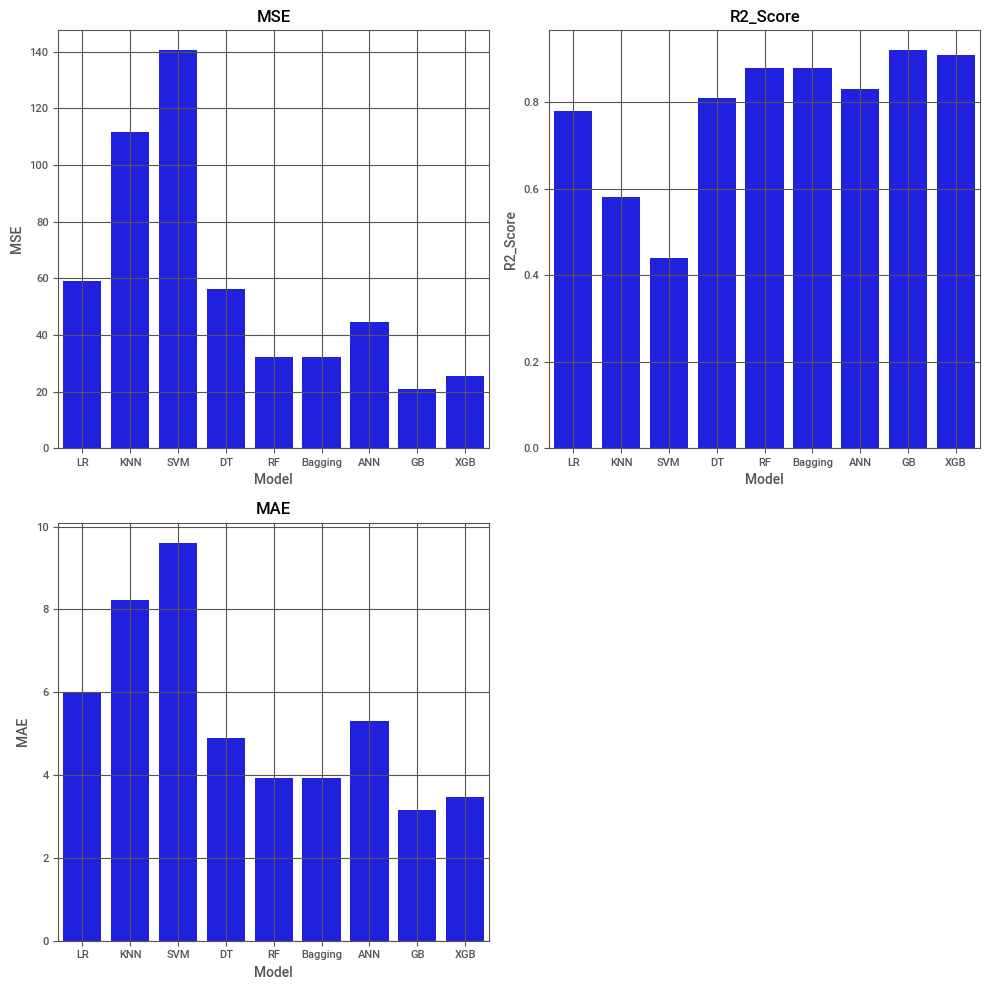

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10), facecolor='white')
plotnumber = 1

for column in compiled_results.columns:
    plt.subplot(2, 2, plotnumber)  # Adjust the number of rows based on the number of columns in compiled_results
    sns.barplot(x=compiled_results.index, y=compiled_results[column], color='blue')  # Use sns.barplot for better visualization
    plt.title(column)
    plt.grid(True)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [190]:
# when we try to implement model we use pickle

In [191]:
import pickle

file = open('regression_model24.pk','wb')
pickle.dump(gb_regressor, file)

In [192]:
# new_data_point = {'cement': 10000, 'slag': 350, 'ash': 70, 'water': 200,  'age': 38}
# new_prediction = rf_random.predict([list(new_data_point.values())])

In [193]:
# print('\nPrediction for new data point:',new_prediction[0])

# Model comparison Report

### Data Analysis Summary and Model Comparison report:

1. Dataset Analysis Overview
- The dataset consists of 1036 samples with 8 features.
- The data points are dispersed, showing wide variations between min and max
- More than 55% of tested cement do not contain ash in the mix.
- About 46% of cement do not have slag while superplastic additive was absent in about 37% of cement tested
- About 40% of the cement mix were left for just about a month
- Overall, the mix ratio did not were not uniformly distributed, probably because there is no linear relationship between concrete strength and the ingredients
- Though few datapoints, they are complete with no missing values
- The variage age seems to be the only non floating continuous variable
2. Models Used
- Linear Regression (LR)
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Decision Tree (DT)
- Random Forest (RF)
- Ridge regressor (RR)
- Gradient Boosting (GB)
- XGBoost (XGB)
- Artificial Neural Network (ANN)
3. Evaluation Metrics
- We employed Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error and R-squared as our primary evaluation metrics.

- Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.
- Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values.
- Mean Absolute Percentage Error (MAPE): Measures the percentage difference between actual and predicted values.
- R-squared (R²): Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
4. Model Comparison
- Observations Random Forest (RF) achieved the lowest MSE, indicating superior performance in minimizing the squared differences between predicted and actual values. Gradient Boosting (GB) and XGBoost (XGB) showed high R² values, suggesting a good fit to the data. Support Vector Machine (SVM) demonstrated competitive performance across multiple metrics.

# Conclusion:

- In this study, we aimed to predict concrete strength using various regression models. We considered three models: Linear Regression, Random Forest Regressor, and XGBoost Regressor. The following summarizes our key findings:

1. **Model Performance:**
   - All three models demonstrated reasonable predictive performance, as indicated by evaluation metrics on the test set.
   - The XGBoost Regressor achieved the lowest Mean Squared Error (MSE), suggesting superior accuracy in predicting concrete strength.
   - Random Forest Regressor also performed well, while Linear Regression showed competitive results.

2. **Hyperparameter Tuning:**
   - Hyperparameter tuning was performed to optimize the models further.
   - XGBoost Regressor benefited significantly from tuning, resulting in improved performance.

3. **Model Strengths and Weaknesses:**
   - Linear Regression, despite its simplicity, provided a good baseline performance.
   - Random Forest Regressor demonstrated robustness and resilience to overfitting, producing consistent results.
   - XGBoost Regressor, with careful hyperparameter tuning, outperformed other models, showcasing its ability to capture complex patterns in the data.

4. **Recommendations:**
   - For simplicity and interpretability, Linear Regression may suffice in scenarios where predictive accuracy is not the sole focus.
   - Random Forest Regressor is a reliable choice, offering a good balance between interpretability and performance.
   - XGBoost Regressor, with its powerful modeling capabilities, is recommended when high accuracy is crucial, and the interpretability trade-off is acceptable.